ОТЧЁТ:
В данном проекте было необходимо создать модель по прогнозированию оттока клиентов для Телеком компании.

1. В нашем распоряжении было четыре датасета: 

данные о контрактах (df_contract), содержащие такие столбцы, как:

    * customerID - ID клиента
    * BeginDate  - дата начала пользования услугами
    * EndDate    - дата окончания пользования услугами 
    * Type       - тип контракта
    * PaperlessBilling - (вероятно) вариант предоставления счета - бумажные или нет
    * PaymentMethod - способ оплаты
    * MonthlyCharges - ежемесячный платеж
    * TotalCharges - общая сумма платежей
    
данные о клиентах (df_person):

    * customerID - ID клиента
    * gender  - пол клиента
    * SeniorCitizen - пенсионер или нет
    * Partner  - наличие гражданского мужа/жены
    * Dependents - есть ли кто-то на иждивении 
    
данные о подключённых интернет услугах (df_internet):

    * customerID - ID клиента
    * InternetService  - технология доступа в интернет
    * OnlineSecurity - доп. услуга 
    * OnlineBackup   - доп. услуга 
    * DeviceProtection - доп. услуга 
    * TechSupport - доп. услуга 
    * StreamingTV - доп. услуга 
    * StreamingMovies - доп. услуга 
    
данные о телефонии (df_phone):

    * customerID - ID клиента
    * MultipleLines  - возможность многоканальных звонков

Все четыре таблицы были объединены по идентификатору клиента внешним образом. Получившиеся пропуски в столбце ‘MultipleLines ’ были заполнены значением ‘Unknown’ - факт того, что клиент не пользуется телефонией. Пропуски в столбцах, относящихся к интернету были заменены на ‘No’.

Целевой признак был выделен из таблицы df_contract, как факт ухода клиента (‘churn’): 0 если в столбце EndDate не стоит даты ухода и 1 если дата ухода есть.

Также был создан новый столбец - ‘days’ - длительность контракта в днях. Данный столбец был получен как разность между датой завершения контракта, если таковая есть, или 1 февраля 2020 года (дата выгрузки данных) и датой начала. 

2. Далее был проведён исследовательский анализ данных:

- столбцы приведены к змеиному регистру;
- было найдено и удалено 11 пропусков в столбце ‘total_charges’;
- типы столбцов, содержащих количественные данные, были заменены на float;
- выбросов в данных в столбцах ‘total_charges’ и ‘monthly_charges’ обнаружено не было;
- но было отмечено, что среднее значение платежа у ушедших больше. Также можно отметить, что у оставшихся разброс значений платежа большой, в то время, как у ушедщих значения ежемесячного платежа более компактны. 
- с помощью библиотеки Sweetwiz был создан отчёт о взаимозависимости данных, 
-  cтолбцы, относящиеся к датам (EndDate и BeginDate), а также ‘Total_Charges’ были удалены из итогового датафрейма во избежание улички данных.
- дубликаты в количестве 23 штук были удалены.

Всего на этом этапе в итоговом датафрейме - 7009 строк и 18 столбцов. 

3. Была проведена предобработка данных перед обучением:

- категориальные признаки были кодированы с помощью OHE (Ordinal Encoder в нашем случае не подходит, тк в обучении предполагается использовать линейные модели),
- данные были разделены на фичи и таргет;
- было произведено разбиение на обучающую и тестовую выборки в отношении 4:1 с использованием параметра stratify для сбалансированности классов;
- масштабирование признаков производилось с использованием StandardScaler.  RobustScaler и MinMaxScaler для нашей задачи не подходили;
- проверка признаков на наличие корреляции производилась с использованием коэффициента Phik. Были найдены корреляции между признаками и некоторые признаками были удалены.

Всего на этом этапе в итоговом датафрейме - 7009 строк и 22 столбца. 

4. Для обучения были использованы следующие ML модели: RandomForestClassifier, DecisionTreeClassifier, LogisticRegression, LGBMClassifier, CatBoostClassifier, XGBClassifier, а также поверх плана была идея использовать две другие модели  GradientBoostingClassifier и MLPClassifier. 
Однако GradientBoostingClassifier работал крайне долго, а результаты показывал средние, что касается MLPClassifier, то, к сожалению, не удалось правильно настроить модель .
- поиск лучших гиперпараметров моделей осуществлялся с помощью RandomizedSearchCV;
- в качестве скоринга рассчитывались метрики: ROC-AUC, accuracy, f1, precision, recall. Первая определялась как наиболее важная;
- по результатам обучения моделей была создана сводная таблица, содержащая значения  метрик и наилучшие параметры моделей, время обучения моделей. 
- наилучший результат  ROC-AUC = 0.9195 показала модель LGBM.
- был построен соответствующий график вместе с графиком базовой модели;
- была построена гистограмма важности признаков, наиболее важными оказались ‘days’ и ‘monthlt_charges’. 

6.  Эксперимент 1:

В качестве эксперимента было решено удалить большинство неважных для модели признаков и оставить лишь 6 наиболее важных: 'monthly_charges', 'days', 'paperless_billing_Yes', 'tech_support_Yes',  'multiple_lines_Yes', 'type_One year'. 

   - была произведена необходимая подготовка данных и модель LGBM была обучена еще раз на новых данных.
   - получили метрику чуть выше, чем было! ROC-AUC = 0.9239
   
Эксперимент 2: 

- оставили только два самых важных признака: 'monthly_charges' и 'days' и снова обучили модель;
- получили метрику чуть-чуть хуже, чем с 6 признаками, но лучше, чем с 22 признаками. ROC-AUC = 0.9232

Получается, что с двумя признаками модель работает немного хуже, чем с шестью, но даже чуть лучше, чем с 22 признаками. Много признаков создают шум. 

Вывод:

Таким образом, типичный портрет уходящего клиента таков: 

-  Он пришел к пройвайдеру в последние несколько лет.
-  Он пользуется интернетом. 
-  Интернетом он пользуется по оптоволокну.
-  По мимо интернета он также пользуется телефонией с возможностью многоканальных звонков. 
-  Вариативность оказываемых услуг для клиента не важна, важна лишь стоимость. 

Если зацепить клиента на некоторый срок у провайдера, то вероятность его ухода снижается. Получается, что как раз для новеньких клиентов очень актуально устраивать акции и сперпредложения с целью удержания. 


## Описание задачи

Необходимо создать модель по прогнозированию оттока клиентов для компании «Ниединогоразрыва.ком». В случае, если выяснится, что пользователь планирует уйти, ему будут предложены промокоды и специальные условия. 
По собранным данным о некоторых клиентах, информации об их тарифах и договорах необходимо обучить модели для прогнозирования факта ухода клиента. 

### План работы

1. Просмотр исходных данных о клиентах и их контрактах, состоящих из четырех датасетов. 

2. Исследовательсикй анализ данных: 
    - приведение столбцов к змеиному регистру, 
    - просмотр на наличие пропусков в данных и выбросов,
    - добавление новых столбов при необходимости, 
    - изменение типов данных, 
    - просмотр распределения данных, 
    - удаление столбцов, не несущих смысловую нагрузку,
    - склеивание всех таблиц в единую таблицу.
    
3. Предобработка данных перед обучением:
    - кодирование категориальных признаков,
    - разделение данных на фичи и таргет (классы должны быть сбалансированы),   
    - разбиение на обучающую и тестовую выборки,
    - масштабирование фичей,
    - проверить признаки на наличие корреляции.
    
4. Обучение моделей: 
    - использование следующих ML моделей: RandomForestClassifier, DecisionTreeClassifier, LogisticRegression, LGBMClassifier, CatBoostClassifier, XGBClassifier
    - поиск лучших гиперпараметров моделей с помощью RandomizedSearchCV либо GridSearchCV.
    
5. Проверка лучших моделей на тестовой выборке:
    - сравнение полученных результатов с базовой моделью,
    - построение таблиц важности признаков.
6. Выводы

### Описание нюансов

1. В качестве оценки качества моделей предполагается использовать метрики: Accuracy, AUC-ROC, построение ROC кривой 
2. Предполагается использование следующих ML моделей: RandomForestClassifier, DecisionTreeClassifier, LogisticRegression, LGBMClassifier, CatBoostClassifier, XGBClassifier
3. С целью экономии памяти предполагается сначала "обработать" каждый датасет отдельно, а после этого склеить в единый датасет для выделения целевого признака и фичей. В качестве индекса использовать CustomerID.
4. Разделение произвести на две выборки: обучающую и тестовую в отношении 4:1. 
5. Посмотреть матрицу корреляции признаков.
6. Для соблюдения сбаланасированности классов при разделении на выборки предполагается использовать параметр stratify
7. При обучении моделей использовать параметр class_weight='balanced', где это возможно. 
8. Произвести оценку качества моделей на тестовой выборке.
9. Выделить наиболее важные признаки.
10. После каждого раздела оставлять выводы.

## Исследовательский анализ данных

### Первичный просмотр 

Импортируем необходимые библиотеки

In [1]:
!pip install sweetviz -q
!pip install phik
!pip install pandas_profiling

In [2]:
import numpy as np
import pandas as pd
import torch
import transformers
from tqdm import notebook
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier

import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

import phik
from phik.report import plot_correlation_matrix
from phik import report

from sklearn.utils import shuffle
import re 
import seaborn as sns
import time

from scipy import stats as st

from sklearn.dummy import DummyRegressor

from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import f1_score,  roc_auc_score, roc_curve,  make_scorer, confusion_matrix, recall_score
from sklearn.metrics import accuracy_score, precision_score

import catboost as ctb
import xgboost as xgb
import lightgbm as ltb

import sweetviz as sv
import pandas_profiling

In [3]:
%matplotlib inline

Загрузим имеющиеся датасеты по-очереди, посмотрим первые 5 строк и информацию о них.

#### Contract

В качестве индекса будем использовать CustomerID.

In [4]:
df_contract = pd.read_csv('contract.csv', index_col= 0)
print(df_contract.info())
df_contract.head()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   BeginDate         7043 non-null   object 
 1   EndDate           7043 non-null   object 
 2   Type              7043 non-null   object 
 3   PaperlessBilling  7043 non-null   object 
 4   PaymentMethod     7043 non-null   object 
 5   MonthlyCharges    7043 non-null   float64
 6   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(6)
memory usage: 440.2+ KB
None


,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
customerID,,,,,,,
7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


Посмотрим даты начала контракта. 

In [5]:
df_contract.BeginDate.value_counts().sort_index()

2013-10-01      3
2013-11-01      2
2013-12-01      3
2014-01-01      7
2014-02-01    366
             ... 
2019-10-01    237
2019-11-01    237
2019-12-01    220
2020-01-01    233
2020-02-01     11
Name: BeginDate, Length: 77, dtype: int64

Видим, что первые контракты были 2013-10-01, а последние 2020-02-01.

В этом датасете внимание привлекает столбец 'EndDate' - судя по всему это и есть факт ухода клиента (конец контракта). 
Создадим новый столбец Churn - наш будущий целевой признак, который будет содержать факт ухода клиента. 0 - не ушел, 1 - ушел.

In [6]:
df_contract['churn'] = df_contract['EndDate'].apply(lambda x: 0 if x == 'No' else 1)

In [7]:
df_contract

,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,churn
customerID,,,,,,,,
7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,0
3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,1
7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...
6840-RESVB,2018-02-01,No,One year,Yes,Mailed check,84.80,1990.5,0
2234-XADUH,2014-02-01,No,One year,Yes,Credit card (automatic),103.20,7362.9,0
4801-JZAZL,2019-03-01,No,Month-to-month,Yes,Electronic check,29.60,346.45,0


Посмотрим уникальные значения даты ухода. 

In [8]:
df_contract.EndDate.value_counts(dropna = False)

No                     5174
2019-11-01 00:00:00     485
2019-12-01 00:00:00     466
2020-01-01 00:00:00     460
2019-10-01 00:00:00     458
Name: EndDate, dtype: int64

Видим, что расторжения начались с октября 2019 года и далее каждый месяц видим уход клиентов примерно в одинаковом количестве. Интересно, с чем это связано? что-то произошло к октябрю 2019го, что клиенты начали уходить?

Посмотрим, сколько расторгнутых контрактов на 1 февраля 2020 года (как указано в условии)

In [9]:
len(df_contract)-df_contract.EndDate.value_counts(dropna = False)[0]

1869

Видим, что большая часть 5174 контракта все еще действуют, а остальные - 1869 уже растрогнуты. 

Установим вместо No дату 1 февраля 2020 года и переведем оба столбца EndDate и BeginDate к типу datetime

In [10]:
df_contract.loc[df_contract['EndDate'] == 'No', 'EndDate'] = '2020-02-01'
df_contract['EndDate'] = df_contract['EndDate'].astype('datetime64')
df_contract.BeginDate = pd.to_datetime(df_contract.BeginDate)

Проверим корректность работы кода

In [11]:
df_contract.EndDate.value_counts(dropna = False)

2020-02-01    5174
2019-11-01     485
2019-12-01     466
2020-01-01     460
2019-10-01     458
Name: EndDate, dtype: int64

In [12]:
df_contract.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   BeginDate         7043 non-null   datetime64[ns]
 1   EndDate           7043 non-null   datetime64[ns]
 2   Type              7043 non-null   object        
 3   PaperlessBilling  7043 non-null   object        
 4   PaymentMethod     7043 non-null   object        
 5   MonthlyCharges    7043 non-null   float64       
 6   TotalCharges      7043 non-null   object        
 7   churn             7043 non-null   int64         
dtypes: datetime64[ns](2), float64(1), int64(1), object(4)
memory usage: 495.2+ KB


Создадим столбец days, содержащий количество дней действия контракта. 

In [13]:
df_contract['days'] = (df_contract['EndDate'] - df_contract['BeginDate'])

In [14]:
df_contract.days = df_contract.days.apply(lambda x: x.days)

In [15]:
df_contract

,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,churn,days
customerID,,,,,,,,,
7590-VHVEG,2020-01-01,2020-02-01,Month-to-month,Yes,Electronic check,29.85,29.85,0,31
5575-GNVDE,2017-04-01,2020-02-01,One year,No,Mailed check,56.95,1889.5,0,1036
3668-QPYBK,2019-10-01,2019-12-01,Month-to-month,Yes,Mailed check,53.85,108.15,1,61
7795-CFOCW,2016-05-01,2020-02-01,One year,No,Bank transfer (automatic),42.30,1840.75,0,1371
9237-HQITU,2019-09-01,2019-11-01,Month-to-month,Yes,Electronic check,70.70,151.65,1,61
...,...,...,...,...,...,...,...,...,...
6840-RESVB,2018-02-01,2020-02-01,One year,Yes,Mailed check,84.80,1990.5,0,730
2234-XADUH,2014-02-01,2020-02-01,One year,Yes,Credit card (automatic),103.20,7362.9,0,2191
4801-JZAZL,2019-03-01,2020-02-01,Month-to-month,Yes,Electronic check,29.60,346.45,0,337


#### Phone

In [16]:
df_phone = pd.read_csv('phone.csv', index_col= 0)
print(df_phone.info())
df_phone.head()

<class 'pandas.core.frame.DataFrame'>
Index: 6361 entries, 5575-GNVDE to 3186-AJIEK
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MultipleLines  6361 non-null   object
dtypes: object(1)
memory usage: 99.4+ KB
None


,MultipleLines
customerID,
5575-GNVDE,No
3668-QPYBK,No
9237-HQITU,No
9305-CDSKC,Yes
1452-KIOVK,Yes


Видим, что услугами телефонии пользуются не все клиенты. MultipleLines - это наличие возможности ведения паралельных линий во время звонка.

In [17]:
df_phone.value_counts()

MultipleLines
No               3390
Yes              2971
dtype: int64

Пока ничего делать не будем с этим датасетом.

#### Internet

In [18]:
df_internet = pd.read_csv('internet.csv', index_col= 0)
print(df_internet.info())
df_internet.head()

<class 'pandas.core.frame.DataFrame'>
Index: 5517 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   InternetService   5517 non-null   object
 1   OnlineSecurity    5517 non-null   object
 2   OnlineBackup      5517 non-null   object
 3   DeviceProtection  5517 non-null   object
 4   TechSupport       5517 non-null   object
 5   StreamingTV       5517 non-null   object
 6   StreamingMovies   5517 non-null   object
dtypes: object(7)
memory usage: 344.8+ KB
None


,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
customerID,,,,,,,
7590-VHVEG,DSL,No,Yes,No,No,No,No
5575-GNVDE,DSL,Yes,No,Yes,No,No,No
3668-QPYBK,DSL,Yes,Yes,No,No,No,No
7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
9237-HQITU,Fiber optic,No,No,No,No,No,No


Видим, что услугами интернета пользуются не все клиенты. Посмотрим, какие значения в столбце 'InternetService'.

In [19]:
df_internet.InternetService.value_counts()

Fiber optic    3096
DSL            2421
Name: InternetService, dtype: int64

На мой взгляд, столбцы этого датасета могут иметь значение для будущих моделей, поэтому пока удалять ничего не будем.

#### Personal

In [20]:
df_personal = pd.read_csv('personal.csv', index_col= 0)
print(df_personal.info())
df_personal.head()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   gender         7043 non-null   object
 1   SeniorCitizen  7043 non-null   int64 
 2   Partner        7043 non-null   object
 3   Dependents     7043 non-null   object
dtypes: int64(1), object(3)
memory usage: 275.1+ KB
None


,gender,SeniorCitizen,Partner,Dependents
customerID,,,,
7590-VHVEG,Female,0,Yes,No
5575-GNVDE,Male,0,No,No
3668-QPYBK,Male,0,No,No
7795-CFOCW,Male,0,No,No
9237-HQITU,Female,0,No,No


#### Общий датасет

Склеим имеющиеся у нас датасеты, так, чтоб получить общую картину по всем клиентам. 

In [21]:
df = df_personal.join(df_contract, how = 'right')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   gender            7043 non-null   object        
 1   SeniorCitizen     7043 non-null   int64         
 2   Partner           7043 non-null   object        
 3   Dependents        7043 non-null   object        
 4   BeginDate         7043 non-null   datetime64[ns]
 5   EndDate           7043 non-null   datetime64[ns]
 6   Type              7043 non-null   object        
 7   PaperlessBilling  7043 non-null   object        
 8   PaymentMethod     7043 non-null   object        
 9   MonthlyCharges    7043 non-null   float64       
 10  TotalCharges      7043 non-null   object        
 11  churn             7043 non-null   int64         
 12  days              7043 non-null   int64         
dtypes: datetime64[ns](2), float64(1), int64(3), object(7)
memory usage: 

In [22]:
df = df.join(df_internet, how = 'left')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   gender            7043 non-null   object        
 1   SeniorCitizen     7043 non-null   int64         
 2   Partner           7043 non-null   object        
 3   Dependents        7043 non-null   object        
 4   BeginDate         7043 non-null   datetime64[ns]
 5   EndDate           7043 non-null   datetime64[ns]
 6   Type              7043 non-null   object        
 7   PaperlessBilling  7043 non-null   object        
 8   PaymentMethod     7043 non-null   object        
 9   MonthlyCharges    7043 non-null   float64       
 10  TotalCharges      7043 non-null   object        
 11  churn             7043 non-null   int64         
 12  days              7043 non-null   int64         
 13  InternetService   5517 non-null   object        
 14  OnlineSecurity

In [23]:
df = df.join(df_phone, how = 'left')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   gender            7043 non-null   object        
 1   SeniorCitizen     7043 non-null   int64         
 2   Partner           7043 non-null   object        
 3   Dependents        7043 non-null   object        
 4   BeginDate         7043 non-null   datetime64[ns]
 5   EndDate           7043 non-null   datetime64[ns]
 6   Type              7043 non-null   object        
 7   PaperlessBilling  7043 non-null   object        
 8   PaymentMethod     7043 non-null   object        
 9   MonthlyCharges    7043 non-null   float64       
 10  TotalCharges      7043 non-null   object        
 11  churn             7043 non-null   int64         
 12  days              7043 non-null   int64         
 13  InternetService   5517 non-null   object        
 14  OnlineSecurity

In [24]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'BeginDate',
       'EndDate', 'Type', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'churn', 'days', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'MultipleLines'],
      dtype='object')

In [25]:
df.columns = [re.sub(r"(\w)([A-Z])", r"\1 \2", col) for col in df.columns]
df.columns = df.columns.str.lower().str.replace(' ','_')

In [26]:
df.columns

Index(['gender', 'senior_citizen', 'partner', 'dependents', 'begin_date',
       'end_date', 'type', 'paperless_billing', 'payment_method',
       'monthly_charges', 'total_charges', 'churn', 'days', 'internet_service',
       'online_security', 'online_backup', 'device_protection', 'tech_support',
       'streaming_tv', 'streaming_movies', 'multiple_lines'],
      dtype='object')

##### Обработка пропусков

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   gender             7043 non-null   object        
 1   senior_citizen     7043 non-null   int64         
 2   partner            7043 non-null   object        
 3   dependents         7043 non-null   object        
 4   begin_date         7043 non-null   datetime64[ns]
 5   end_date           7043 non-null   datetime64[ns]
 6   type               7043 non-null   object        
 7   paperless_billing  7043 non-null   object        
 8   payment_method     7043 non-null   object        
 9   monthly_charges    7043 non-null   float64       
 10  total_charges      7043 non-null   object        
 11  churn              7043 non-null   int64         
 12  days               7043 non-null   int64         
 13  internet_service   5517 non-null   object        
 14

Посмотрим строки, где остались пропуски в столбце 'multiple_lines'.

In [28]:
df[(df.multiple_lines.isna()==True)]

,gender,senior_citizen,partner,dependents,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,...,churn,days,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,2020-01-01,2020-02-01,Month-to-month,Yes,Electronic check,29.85,...,0,31,DSL,No,Yes,No,No,No,No,NaN
7795-CFOCW,Male,0,No,No,2016-05-01,2020-02-01,One year,No,Bank transfer (automatic),42.30,...,0,1371,DSL,Yes,No,Yes,Yes,No,No,NaN
6713-OKOMC,Female,0,No,No,2019-04-01,2020-02-01,Month-to-month,No,Mailed check,29.75,...,0,306,DSL,Yes,No,No,No,No,No,NaN
8779-QRDMV,Male,1,No,No,2019-11-01,2019-12-01,Month-to-month,Yes,Electronic check,39.65,...,1,30,DSL,No,No,Yes,No,No,Yes,NaN
8665-UTDHZ,Male,0,Yes,Yes,2019-11-01,2019-12-01,Month-to-month,No,Electronic check,30.20,...,1,30,DSL,No,Yes,No,No,No,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4501-VCPFK,Male,0,No,No,2017-12-01,2020-02-01,Month-to-month,No,Electronic check,35.75,...,0,792,DSL,No,No,Yes,Yes,No,No,NaN
2274-XUATA,Male,1,Yes,No,2014-02-01,2020-02-01,Two year,Yes,Bank transfer (automatic),63.10,...,0,2191,DSL,Yes,Yes,Yes,Yes,Yes,Yes,NaN
2235-DWLJU,Female,1,No,No,2019-08-01,2020-02-01,Month-to-month,Yes,Electronic check,44.40,...,0,184,DSL,No,No,No,No,Yes,Yes,NaN


 Видим 682 значения. То есть это клиенты, которые пользуются только интернетом, а телефоном - нет. 
 
 Проверим также, есть ли клиенты, которые не пользуются ни телефонией, ни интернетом (но при этом что-то платят =))) ).

In [29]:
df[(df.multiple_lines.isna()==True)&(df.internet_service.isna()==True)]

,gender,senior_citizen,partner,dependents,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,...,churn,days,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines
customerID,,,,,,,,,,,,,,,,,,,,,


Нет таких. Хорошо. 

Заменим пропуски в столбце 'multiple_lines' на Unknomn, чтоб в дальнейшем можно было видеть клиентов, у которых не было телефонии. 

In [30]:
df.multiple_lines = df.multiple_lines.fillna(value='Unknown')

In [31]:
df[(df.multiple_lines.isna()==True)]

,gender,senior_citizen,partner,dependents,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,...,churn,days,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines
customerID,,,,,,,,,,,,,,,,,,,,,


Все сработало корректно. Теперь посмотрим клиентов, которые не пользуются интернетом. 

In [32]:
df[df.streaming_tv.isna()==True]

,gender,senior_citizen,partner,dependents,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,...,churn,days,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines
customerID,,,,,,,,,,,,,,,,,,,,,
7469-LKBCI,Male,0,No,No,2018-10-01,2020-02-01,Two year,No,Credit card (automatic),18.95,...,0,488,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
8191-XWSZG,Female,0,No,No,2015-10-01,2020-02-01,One year,No,Mailed check,20.65,...,0,1584,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
1680-VDCWW,Male,0,Yes,No,2019-02-01,2020-02-01,One year,No,Bank transfer (automatic),19.80,...,0,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
1066-JKSGK,Male,0,No,No,2019-11-01,2019-12-01,Month-to-month,No,Mailed check,20.15,...,1,30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
7310-EGVHZ,Male,0,No,No,2020-01-01,2020-02-01,Month-to-month,No,Bank transfer (automatic),20.20,...,0,31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4807-IZYOZ,Female,0,No,No,2015-11-01,2020-02-01,Two year,No,Bank transfer (automatic),20.65,...,0,1553,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
9710-NJERN,Female,0,No,No,2016-11-01,2020-02-01,Two year,No,Mailed check,20.15,...,0,1187,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
9837-FWLCH,Male,0,Yes,Yes,2019-02-01,2020-02-01,Month-to-month,Yes,Electronic check,19.20,...,0,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No


То есть 1526 человек пользуются только телефонией, а интернетом не пользуются. 

Заменим пропуски в столбцах, отвечающих за интернет подключение, на No.

In [33]:
df_internet.columns = [re.sub(r"(\w)([A-Z])", r"\1 \2", col) for col in df_internet.columns]
df_internet.columns = df_internet.columns.str.lower().str.replace(' ','_')
df_internet.columns

Index(['internet_service', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies'],
      dtype='object')

In [34]:
for i in df_internet.columns:
    df[i] = df[i].fillna(value='No')

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   gender             7043 non-null   object        
 1   senior_citizen     7043 non-null   int64         
 2   partner            7043 non-null   object        
 3   dependents         7043 non-null   object        
 4   begin_date         7043 non-null   datetime64[ns]
 5   end_date           7043 non-null   datetime64[ns]
 6   type               7043 non-null   object        
 7   paperless_billing  7043 non-null   object        
 8   payment_method     7043 non-null   object        
 9   monthly_charges    7043 non-null   float64       
 10  total_charges      7043 non-null   object        
 11  churn              7043 non-null   int64         
 12  days               7043 non-null   int64         
 13  internet_service   7043 non-null   object        
 14

Хорошо. Пропусков теперь нет.

##### Исследование данных

Посмотрим, какой разброс значений в столбце 'total_charges'.

In [36]:
df.total_charges.sort_values()

customerID
5709-LVOEQ          
3213-VVOLG          
2520-SGTTA          
3115-CZMZD          
2923-ARZLG          
               ...  
8249-THVEC    997.75
6051-PTVNS     998.1
5899-MQZZL    999.45
4536-PLEQY     999.8
9093-FPDLG     999.9
Name: total_charges, Length: 7043, dtype: object

О, видим пустые значения, видимо пробелы. Посмотрим эти строки и сколько таких строк. 

In [37]:
df[df.total_charges ==' '] 

,gender,senior_citizen,partner,dependents,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,...,churn,days,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines
customerID,,,,,,,,,,,,,,,,,,,,,
4472-LVYGI,Female,0,Yes,Yes,2020-02-01,2020-02-01,Two year,Yes,Bank transfer (automatic),52.55,...,0,0,DSL,Yes,No,Yes,Yes,Yes,No,Unknown
3115-CZMZD,Male,0,No,Yes,2020-02-01,2020-02-01,Two year,No,Mailed check,20.25,...,0,0,No,No,No,No,No,No,No,No
5709-LVOEQ,Female,0,Yes,Yes,2020-02-01,2020-02-01,Two year,No,Mailed check,80.85,...,0,0,DSL,Yes,Yes,Yes,No,Yes,Yes,No
4367-NUYAO,Male,0,Yes,Yes,2020-02-01,2020-02-01,Two year,No,Mailed check,25.75,...,0,0,No,No,No,No,No,No,No,Yes
1371-DWPAZ,Female,0,Yes,Yes,2020-02-01,2020-02-01,Two year,No,Credit card (automatic),56.05,...,0,0,DSL,Yes,Yes,Yes,Yes,Yes,No,Unknown
7644-OMVMY,Male,0,Yes,Yes,2020-02-01,2020-02-01,Two year,No,Mailed check,19.85,...,0,0,No,No,No,No,No,No,No,No
3213-VVOLG,Male,0,Yes,Yes,2020-02-01,2020-02-01,Two year,No,Mailed check,25.35,...,0,0,No,No,No,No,No,No,No,Yes
2520-SGTTA,Female,0,Yes,Yes,2020-02-01,2020-02-01,Two year,No,Mailed check,20.00,...,0,0,No,No,No,No,No,No,No,No
2923-ARZLG,Male,0,Yes,Yes,2020-02-01,2020-02-01,One year,Yes,Mailed check,19.70,...,0,0,No,No,No,No,No,No,No,No


In [38]:
len(df[df.total_charges ==' '])

11

Видим, что это клиенты, пришедшие только 1 февраля 2020 года, то есть на момент выгрузки данных. 11 человек - не так много. Но лучше удалим эти строки, чтобы не было искажения данных.  

In [39]:
df = df.loc[df.total_charges !=' ']

Поменяем тип данных в столбце 'total_charges'.

In [40]:
df.total_charges = df.total_charges.astype('float')

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   gender             7032 non-null   object        
 1   senior_citizen     7032 non-null   int64         
 2   partner            7032 non-null   object        
 3   dependents         7032 non-null   object        
 4   begin_date         7032 non-null   datetime64[ns]
 5   end_date           7032 non-null   datetime64[ns]
 6   type               7032 non-null   object        
 7   paperless_billing  7032 non-null   object        
 8   payment_method     7032 non-null   object        
 9   monthly_charges    7032 non-null   float64       
 10  total_charges      7032 non-null   float64       
 11  churn              7032 non-null   int64         
 12  days               7032 non-null   int64         
 13  internet_service   7032 non-null   object        
 14

Посмотрим, какой разброс значений в столбце 'monthly_charges'.

In [42]:
df.monthly_charges.sort_values()

customerID
6823-SIDFQ     18.25
9764-REAFF     18.40
0827-ITJPH     18.55
0621-CXBKL     18.70
9945-PSVIP     18.70
               ...  
8199-ZLLSA    118.35
5989-AXPUC    118.60
5734-EJKXG    118.60
8984-HPEMB    118.65
7569-NMZYQ    118.75
Name: monthly_charges, Length: 7032, dtype: float64

Разброс большой. От 18 до 118 у.е. Интересно, с чем это может быть связано?

Создадим общий отчет с помощью библиотеки Sweetviz

После отчета, помимо всего прочего, конечно, видим, что:
1. Около 18% людей пенсионного возраста.
2. Ежемесячный платеж коррелирует с общим платежом (что вполне логично). 
3. Ежемесячный платеж также коррелирует с internet_service. Надо покопать в этом направлении. 
4. Количество дней действия контракта коррелирует с типом платежа. 
5. Столбцы, отнсящиеся к интернету, такие как 'internet_service', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies' имеют примерно одинаковое распределение между 'No' (65-70%) и 'Yes' (30-35%).
6. На целевой признак влияют 'end_date' (что логично), а также 'type' и 'internet_service'. 

In [43]:
pandas_profiling.ProfileReport(df)

Попробуем проверить выше изложенные предположения.

1. Около 18% людей пенсионного возраста. Посмотрим, какими услугами больше пользуются люди разного возраста. И как от возраста зависит целевой признак.

На мой взгляд, удобнее создать копию текущего датафрейма и перевести категориальные данные в 0 и 1. Тогда удобнее будет группировать и смотреть зависимости. 

*

In [44]:
df_cat = df.copy()

In [45]:
cols_cat = ['partner', 'paperless_billing', 'online_security', 'online_backup', 'device_protection', 
            'tech_support', 'streaming_tv', 'streaming_movies']

In [46]:
for col in cols_cat:
    df_cat[col] = df_cat[col].apply(lambda x: 0 if x == 'No' else 1)

In [47]:
df_cat['gender'] = df_cat['gender'].apply(lambda x: 1 if x == 'Male' else 0)

In [48]:
df_cat.head()

,gender,senior_citizen,partner,dependents,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,...,churn,days,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,0,1,No,2020-01-01,2020-02-01,Month-to-month,1,Electronic check,29.85,...,0,31,DSL,0,1,0,0,0,0,Unknown
5575-GNVDE,1,0,0,No,2017-04-01,2020-02-01,One year,0,Mailed check,56.95,...,0,1036,DSL,1,0,1,0,0,0,No
3668-QPYBK,1,0,0,No,2019-10-01,2019-12-01,Month-to-month,1,Mailed check,53.85,...,1,61,DSL,1,1,0,0,0,0,No
7795-CFOCW,1,0,0,No,2016-05-01,2020-02-01,One year,0,Bank transfer (automatic),42.30,...,0,1371,DSL,1,0,1,1,0,0,Unknown
9237-HQITU,0,0,0,No,2019-09-01,2019-11-01,Month-to-month,1,Electronic check,70.70,...,1,61,Fiber optic,0,0,0,0,0,0,No


Посмотрим на группировку по пенсионному возрасту. 

Всего пенсионеров.

In [49]:
len(df[df_cat['senior_citizen']==1])

1142

In [50]:
df_cat[df_cat['senior_citizen']==1]['multiple_lines'].value_counts(normalize=True)

Yes        0.582312
No         0.326620
Unknown    0.091068
Name: multiple_lines, dtype: float64

Пенсионеров, не пользующихся телефонией - 9%.

In [51]:
df_cat[df_cat['senior_citizen']==1]['internet_service'].value_counts(normalize=True)

Fiber optic    0.727671
DSL            0.226795
No             0.045534
Name: internet_service, dtype: float64

Пенсионеров, не пользующихся интернетом - 4%.

In [52]:
df_cat[df_cat['senior_citizen']==0]['multiple_lines'].value_counts(normalize=True)

No         0.511375
Yes        0.390832
Unknown    0.097793
Name: multiple_lines, dtype: float64

При этом не пенсионеров, не пользующихся телефонией тоже 9%.

In [53]:
df_cat[df_cat['senior_citizen']==0]['internet_service'].value_counts(normalize=True)

Fiber optic    0.384550
DSL            0.366214
No             0.249236
Name: internet_service, dtype: float64

А не пенсионеров, не пользующихся интернетом 24%.

In [54]:
df_cat.groupby(['senior_citizen'])['churn'].mean()

senior_citizen
0    0.236503
1    0.416813
Name: churn, dtype: float64

Видим, что колмчество ушедших пенсионеров больше, чем не пенсионеров. 

Теперь посмотрим на группировку по полу.

In [55]:
df_cat[df_cat['gender']==1]['multiple_lines'].value_counts(normalize=True)

No         0.483516
Yes        0.417582
Unknown    0.098901
Name: multiple_lines, dtype: float64

Мужчин, не пользующихся телефонией - 9%.

In [56]:
df_cat[df_cat['gender']==1]['internet_service'].value_counts(normalize=True)

Fiber optic    0.43477
DSL            0.34714
No             0.21809
Name: internet_service, dtype: float64

Мужчин, не пользующихся интернетом - 21%.

In [57]:
df_cat[df_cat['gender']==0]['multiple_lines'].value_counts(normalize=True)

No         0.479185
Yes        0.426357
Unknown    0.094459
Name: multiple_lines, dtype: float64

При этом женщин, не пользующихся телефонией тоже 9%.

In [58]:
df_cat[df_cat['gender']==0]['internet_service'].value_counts(normalize=True)

Fiber optic    0.445880
DSL            0.339937
No             0.214183
Name: internet_service, dtype: float64

А женщин, не пользующихся интернетом 21%.

In [59]:
df_cat.groupby(['gender'])['churn'].mean()

gender
0    0.269595
1    0.262046
Name: churn, dtype: float64

В итоге видим, что группировки похожие. Кроме того, что не пенсионеров, не пользующихся интернетом значительно больше, чем пенсионеров. 

И пенсионеры больше уходят от оператора, чем не пенсионеры.

Посмотрим на общую группировку по пенсионному возрасту. 

In [60]:
df_cat.groupby('senior_citizen').mean()

,gender,partner,paperless_billing,monthly_charges,total_charges,churn,days,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies
senior_citizen,,,,,,,,,,,,,
0,0.505093,0.478778,0.558913,61.885594,2181.089550,0.236503,982.396774,0.294228,0.330900,0.331409,0.302207,0.361800,0.362649
1,0.502627,0.501751,0.767075,79.820359,2810.465193,0.416813,1014.057793,0.246935,0.416813,0.408056,0.227671,0.500876,0.521016


Видим, что в данные в принципе похоже, можно выделить, что пенсионеры больше тратят на услуги (возможно это связано с консервативностью) и чаще просят бумажный чек, что в целом логично. 

Интересно, что пенсионеры чаще пользуются многоканальной линией телефонной связи. 

Посмотрим на общую группировку по половому признаку. 

In [61]:
df_cat.groupby('gender').mean()

,senior_citizen,partner,paperless_billing,monthly_charges,total_charges,churn,days,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies
gender,,,,,,,,,,,,,
0,0.163078,0.483204,0.598622,65.216652,2283.190985,0.269595,983.549239,0.293999,0.351134,0.344243,0.293999,0.387884,0.393339
1,0.161736,0.481826,0.586926,64.387546,2283.407861,0.262046,991.453649,0.279234,0.338687,0.343477,0.286278,0.380952,0.383488


Здесь вообще практически идентичные выборки.

2. Ежемесячный платеж коррелирует с общим платежом.

Рассчитаем среднее количество месяцев жизни клиента по затратам. В столбец 'fact_month'

In [62]:
df_cat['fact_month'] = df_cat['total_charges']/df_cat['monthly_charges']

В столбец 'm_days' запишем среднее количество месяцев клиентского срока исходя из количества дней.

In [63]:
df_cat['m_month'] = (df_cat['days']/30.42).round(2)

In [64]:
df_cat.head()

,gender,senior_citizen,partner,dependents,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,...,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines,fact_month,m_month
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,0,0,1,No,2020-01-01,2020-02-01,Month-to-month,1,Electronic check,29.85,...,DSL,0,1,0,0,0,0,Unknown,1.000000,1.02
5575-GNVDE,1,0,0,No,2017-04-01,2020-02-01,One year,0,Mailed check,56.95,...,DSL,1,0,1,0,0,0,No,33.178227,34.06
3668-QPYBK,1,0,0,No,2019-10-01,2019-12-01,Month-to-month,1,Mailed check,53.85,...,DSL,1,1,0,0,0,0,No,2.008357,2.01
7795-CFOCW,1,0,0,No,2016-05-01,2020-02-01,One year,0,Bank transfer (automatic),42.30,...,DSL,1,0,1,1,0,0,Unknown,43.516548,45.07
9237-HQITU,0,0,0,No,2019-09-01,2019-11-01,Month-to-month,1,Electronic check,70.70,...,Fiber optic,0,0,0,0,0,0,No,2.144979,2.01


Посмотрим разницу между фактическими и теоретическими месяцами. Возьмем погрешность в 7 дней. 

In [65]:
df_cat[abs(df_cat['m_month'] - df_cat['fact_month'])>7]

,gender,senior_citizen,partner,dependents,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,...,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines,fact_month,m_month
customerID,,,,,,,,,,,,,,,,,,,,,
8207-VVMYB,0,0,1,No,2014-04-01,2020-02-01,Two year,1,Bank transfer (automatic),26.00,...,No,0,0,0,0,0,0,Yes,77.190385,70.09
1399-OUPJN,0,0,1,Yes,2015-05-01,2020-02-01,Two year,0,Bank transfer (automatic),19.75,...,No,0,0,0,0,0,0,No,64.407595,57.10
6010-DDPPW,1,0,1,No,2014-04-01,2020-02-01,Two year,0,Bank transfer (automatic),25.15,...,No,0,0,0,0,0,0,Yes,77.170974,70.09
8241-JUIQO,0,0,0,No,2015-01-01,2020-02-01,One year,0,Bank transfer (automatic),19.45,...,No,0,0,0,0,0,0,No,68.706941,61.05
5893-KCLGT,0,0,0,Yes,2014-02-01,2020-02-01,Two year,1,Mailed check,19.75,...,No,0,0,0,0,0,0,No,79.341772,72.02


Видим, что строк всего 5. И погрешность везде до 8 дней. То есть аномальных пар месячного платежа и общего платежа не найдено. 

3. Ежемесячный платеж также коррелирует с internet_service.

Посмотрим медианное значение ежемесячного платежа по столбцу 'internet_service'.

In [66]:
df_cat.groupby('internet_service')['monthly_charges'].median()

internet_service
DSL            56.150
Fiber optic    91.675
No             20.150
Name: monthly_charges, dtype: float64

Видим, что за интернет клиенты платят значительно больше, чем за телефонию. 

In [67]:
df_cat.internet_service.value_counts(normalize = True)

Fiber optic    0.440273
DSL            0.343572
No             0.216155
Name: internet_service, dtype: float64

Да и пользуются интернетом 78% клиентов. Теперь становится немного яснее, почему был большой разброс ежемесяного платежа. 

1526 человека пользуются только телефонией. Подтвердим, это расчетом.

In [68]:
df_cat[df_cat['internet_service']=='No'].groupby('multiple_lines')['monthly_charges'].median()

multiple_lines
No     19.95
Yes    25.00
Name: monthly_charges, dtype: float64

Действительно, наше предположение верно: низкие ежемесячные платежи появляются из-за клиентов, которые пользуются только телефонией. У кого подключена многоканальность, тот платит чуть больше. Это логично. 

Посмотрим медианное значение ежемесячного платежа в группировке по поключению среди людей, которые пользуются только интернетом. 

In [69]:
df_cat[df_cat['multiple_lines']=='Unknown'].groupby('internet_service')['monthly_charges'].median()

internet_service
DSL    40.55
Name: monthly_charges, dtype: float64

Видим, что среди людей, пользующихся только интернетом, коих 680 человек, присутствует только подключение DSL. И медианное значение  - 40.5. А среди тех, кто пользуется и телефонией и интернетом с поключением через DSL медианное значение 56.15. Телефония добавляет свою лепту. Вроде все логично.

Посмотрим на связь между пользователями телефонии и фактом ухода. 

In [70]:
df_cat.groupby(['multiple_lines'])['churn'].mean()

multiple_lines
No         0.250812
Unknown    0.250000
Yes        0.286485
Name: churn, dtype: float64

Люди с телефонией скорее остаются.

In [71]:
df_cat.groupby(['internet_service'])['churn'].mean()

internet_service
DSL            0.189983
Fiber optic    0.418928
No             0.074342
Name: churn, dtype: float64

Пользователи интернета с подключением Fiber optic в большем количестве уходят, чем все остальные. Пока все указывает на недовольство клиентов дороговизной оптики.

Посмотрим на даты начала контракта ушедших клиентов с подключением через оптику.

In [72]:
df_cat[(df_cat['internet_service']=='Fiber optic')&(df_cat['churn']==1)]['begin_date'].value_counts().head(20)#.sum()

2019-09-01    99
2019-10-01    88
2019-11-01    64
2019-12-01    53
2019-07-01    53
2019-08-01    43
2019-06-01    40
2019-05-01    39
2019-03-01    36
2018-12-01    34
2019-02-01    29
2019-01-01    29
2019-04-01    28
2018-09-01    27
2018-06-01    26
2018-11-01    25
2017-11-01    22
2018-10-01    21
2018-08-01    20
2017-12-01    19
Name: begin_date, dtype: int64

In [73]:
df_cat[(df_cat['internet_service']=='Fiber optic')&(df_cat['churn']==1)]['begin_date'].value_counts().head(20).sum()

795

Видим, что большая часть ушедших клиентов - это относительно новые клиенты. При этом старые клиенты уходят меньше. 

Посмотрим, сколько клиентов, пришедших в эти же дни, осталось. 

In [74]:
i = df_cat[(df_cat['internet_service']=='Fiber optic')&(df_cat['churn']==1)]['begin_date'].value_counts().head(20).index
i.to_list()

[Timestamp('2019-09-01 00:00:00'),
 Timestamp('2019-10-01 00:00:00'),
 Timestamp('2019-11-01 00:00:00'),
 Timestamp('2019-12-01 00:00:00'),
 Timestamp('2019-07-01 00:00:00'),
 Timestamp('2019-08-01 00:00:00'),
 Timestamp('2019-06-01 00:00:00'),
 Timestamp('2019-05-01 00:00:00'),
 Timestamp('2019-03-01 00:00:00'),
 Timestamp('2018-12-01 00:00:00'),
 Timestamp('2019-02-01 00:00:00'),
 Timestamp('2019-01-01 00:00:00'),
 Timestamp('2019-04-01 00:00:00'),
 Timestamp('2018-09-01 00:00:00'),
 Timestamp('2018-06-01 00:00:00'),
 Timestamp('2018-11-01 00:00:00'),
 Timestamp('2017-11-01 00:00:00'),
 Timestamp('2018-10-01 00:00:00'),
 Timestamp('2018-08-01 00:00:00'),
 Timestamp('2017-12-01 00:00:00')]

In [75]:
d = df_cat[(df_cat['internet_service']=='Fiber optic')&(df_cat['churn']==0)&(df_cat['begin_date'].isin(i.to_list())==True)]['begin_date'].value_counts().head(20).sum()
d

422

Почти в два раза меньше клиентов остается, чем уходит. 

Посмотрим на даты начала контракта оставшихся клиентов с подключением через оптику.

In [76]:
df_cat[(df_cat['internet_service']=='Fiber optic')&(df_cat['churn']==0)]['begin_date'].value_counts().head(20)#.sum()

2014-02-01    159
2014-03-01     62
2014-10-01     39
2014-04-01     38
2014-09-01     36
2014-05-01     35
2014-07-01     35
2019-12-01     35
2015-06-01     35
2019-11-01     34
2014-06-01     33
2020-01-01     32
2015-02-01     32
2019-05-01     31
2014-08-01     29
2014-11-01     29
2015-01-01     28
2014-12-01     27
2018-08-01     27
2015-11-01     25
Name: begin_date, dtype: int64

Видим, что преимущественно те, кто не уходят - это старые клиенты.

4. Количество дней действия контракта коррелирует с типом платежа.

Сгруппируем данные по типу платежа и посмотрим длительность. 

In [77]:
df_cat.groupby('type')['days'].median()

type
Month-to-month     365.0
One year          1340.0
Two year          1949.0
Name: days, dtype: float64

In [78]:
df_cat['type'].value_counts(normalize = True)

Month-to-month    0.551052
Two year          0.239619
One year          0.209329
Name: type, dtype: float64

Получается, что от типа контракта действительно зависит его продолжительность: по типу Month-to-month - самая низкая продолжительность (1 год ). А таких клиентов - 50%. 

Посмотрим на распределение типа у ушедших клиентов. 

In [79]:
df_cat[(df_cat['churn']==1)]['type'].value_counts()

Month-to-month    1655
One year           166
Two year            48
Name: type, dtype: int64

И видим ту же картину: клиенты с небольшим сроком жизни контратка продлеваться уже не хотят. Предположительно из-за высокой стоимости. 

In [80]:
alpha = .05 # критический уровень статистической значимости

results = st.ttest_ind(df[df['churn']==1]['monthly_charges'], 
                       df[df['churn']==0]['monthly_charges'], 
                       equal_var = False)

print('Средний ежемесячный платеж ушедших клиентов', df[df['churn']==1]['monthly_charges'].mean())
print('Средний ежемесячный платеж оставшихся клиентов', df[df['churn']==0]['monthly_charges'].mean())
                                                           
print( )
print('p-значение:', results.pvalue)

if (results.pvalue < alpha): 
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

Средний ежемесячный платеж ушедших клиентов 74.4413322632423
Средний ежемесячный платеж оставшихся клиентов 61.30740848343966

p-значение: 2.657357144516026e-72
Отвергаем нулевую гипотезу


In [81]:
alpha = .05 # критический уровень статистической значимости

results = st.ttest_ind(df[df['churn']==1]['monthly_charges'], 
                       df['monthly_charges'], 
                       equal_var = False)

print('Средний ежемесячный платеж ушедших клиентов', df[df['churn']==1]['monthly_charges'].mean())
print('Средний ежемесячный платеж оставшихся клиентов', df['monthly_charges'].mean())
                                                           
print( )
print('p-значение:', results.pvalue)

if (results.pvalue < alpha): 
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

Средний ежемесячный платеж ушедших клиентов 74.4413322632423
Средний ежемесячный платеж оставшихся клиентов 64.79820819112632

p-значение: 3.616954032774568e-45
Отвергаем нулевую гипотезу


5. Столбцы, относящиеся к интернету, такие как 'internet_service', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies' имеют примерно одинаковое распределение между 'No' (65-70%) и 'Yes' (30-35%).

Посмотрим корреляцию между этими признаками. Для этого построим матрицу корреляции с коэффициентом корреляции Phik, так как у нас категориальные переменные. 

In [82]:
interval_cols = ['monthly_charges','total_charges','days']
phik_overview = df_cat[['internet_service', 'online_security', 'online_backup', 'device_protection',
                        'tech_support', 'streaming_tv', 'streaming_movies']].phik_matrix()

interval_cols not set, guessing: ['online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies']


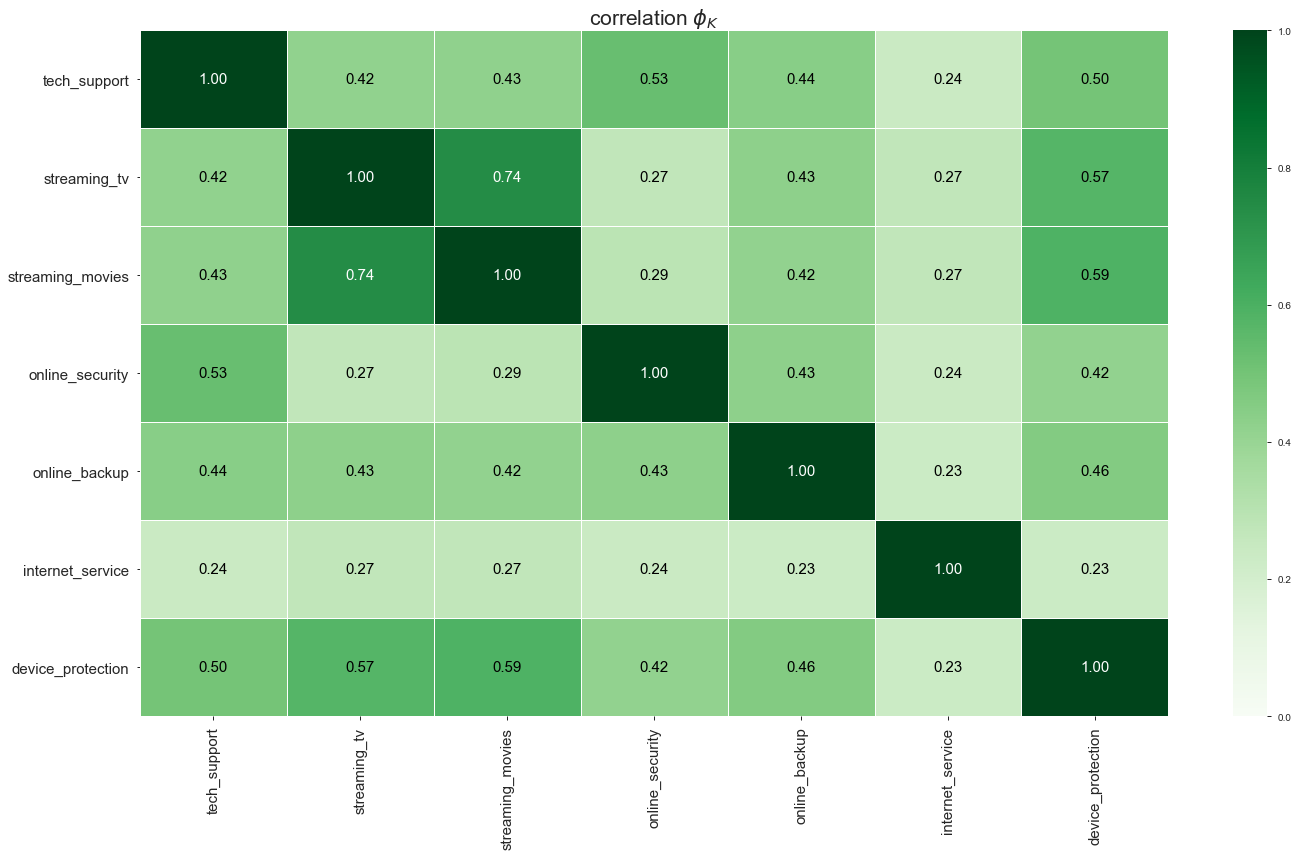

In [83]:
plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map="Greens", 
                        title=r"correlation $\phi_K$", 
                        fontsize_factor=1.5, 
                            figsize=(20, 12))
plt.tight_layout()

Видим некоторую зависимость между 'streaming_tv' и 'streaming_movies'. А в остальном все в пределах нормы.

 6. На целевой признак влияет 'internet_service'.

In [84]:
df_cat[(df_cat['churn']==1)].groupby(['internet_service', 'multiple_lines'])['gender'].count()

internet_service  multiple_lines
DSL               No                216
                  Unknown           170
                  Yes                73
Fiber optic       No                530
                  Yes               767
No                No                103
                  Yes                10
Name: gender, dtype: int64

Видим, что больше всего ушло людей, пользующихся и Fiber optic и телефонией - подавляющее большинство. 

Возможно, способ подключения по оптическому каналу появился недавно?

In [85]:
df_cat[df_cat['internet_service']=='Fiber optic']['begin_date'].sort_values()

customerID
2889-FPWRM   2013-10-01
0917-EZOLA   2013-10-01
7317-GGVPB   2013-11-01
2834-JRTUA   2013-11-01
1555-DJEQW   2013-12-01
                ...    
2424-WVHPL   2020-01-01
1640-PLFMP   2020-01-01
2468-SJFLM   2020-01-01
7439-DKZTW   2020-01-01
1452-VOQCH   2020-01-01
Name: begin_date, Length: 3096, dtype: datetime64[ns]

Нет. был давно. Возможно, тарифы изменились?

Посмотрим на клиентов с высоким ежемесячным платежом в группировке по факту ухода.

In [86]:
df_cat[df_cat['monthly_charges']>100].groupby('churn').count()

,gender,senior_citizen,partner,dependents,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,...,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines,fact_month,m_month
churn,,,,,,,,,,,,,,,,,,,,,
0,649,649,649,649,649,649,649,649,649,649,...,649,649,649,649,649,649,649,649,649,649
1,253,253,253,253,253,253,253,253,253,253,...,253,253,253,253,253,253,253,253,253,253


Видим, что с платежом больше 100 у.е. уходит только 25% клиентов. 

Посмотрим медианный платеж у клиентов, подключившихся до 1 января 2017 года.

In [87]:
df_cat[(df_cat['begin_date'] < '2017-01-01')][['monthly_charges', 'churn']].mean()

monthly_charges    72.308274
churn               0.126053
dtype: float64

Видим, что клиенты почти не уходят. 

Посмотрим медианный платеж у клиентов, подключившихся после 1 января 2017 года.

In [88]:
df_cat[(df_cat['begin_date'] > '2017-01-01')][['monthly_charges', 'churn']].mean()

monthly_charges    59.211597
churn               0.370157
dtype: float64

Видим, что средний платеж стал меньше, но клиенты стали больше уходить!

Посмотрим на те же данные, но при условии подключения по оптическому каналу. 

In [89]:
df_cat[(df_cat['begin_date'] < '2017-01-01')&(df_cat['internet_service']=='Fiber optic')][['monthly_charges', 'churn']].mean()

monthly_charges    99.346191
churn               0.220314
dtype: float64

In [90]:
df_cat[(df_cat['begin_date'] > '2017-01-01')&(df_cat['internet_service']=='Fiber optic')][['monthly_charges', 'churn']].mean()

monthly_charges    85.420747
churn               0.572917
dtype: float64

Видим, что до 2017 года средний платеж был вообще 100 у.е., но клиентов уходит немного. А в последние года средний платеж уменьшился, а уходить стало больше половины клиентов. 

Возможно стоит подумать о качестве оказываемых услуг?

Посмотрим описательные статистики и ящики с усами. Может быть у нас есть выбросы?

Смотреть будем на оригинальном датафрейме - df.

In [91]:
df[df['churn']==1].describe()

,senior_citizen,monthly_charges,total_charges,churn,days
count,1869.000000,1869.000000,1869.000000,1869.0,1869.000000
mean,0.254682,74.441332,1531.796094,1.0,547.352060
std,0.435799,24.666053,1890.822994,0.0,594.389607
min,0.000000,18.850000,18.850000,1.0,30.000000
25%,0.000000,56.150000,134.500000,1.0,61.000000
50%,0.000000,79.650000,703.550000,1.0,304.000000
75%,1.000000,94.200000,2331.300000,1.0,883.000000
max,1.000000,118.350000,8684.800000,1.0,2191.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x16f1f664550>,
 'caps': [<matplotlib.lines.Line2D at 0x16f1f664bb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x16f1f664280>],
 'medians': [<matplotlib.lines.Line2D at 0x16f1f6700d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x16f1f6703a0>],
 'means': []}

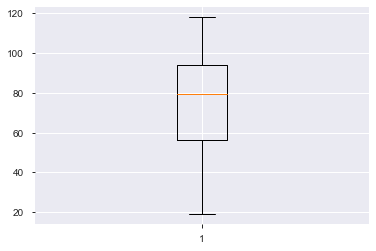

In [92]:
plt.boxplot(df[df['churn']==1]['monthly_charges'])

In [93]:
df[df['churn']==0].describe()

,senior_citizen,monthly_charges,total_charges,churn,days
count,5163.000000,5163.000000,5163.000000,5163.0,5163.000000
mean,0.128995,61.307408,2555.344141,0.0,1146.885532
std,0.335227,31.094557,2329.456984,0.0,732.773458
min,0.000000,18.250000,18.800000,0.0,31.000000
25%,0.000000,25.100000,577.825000,0.0,457.000000
50%,0.000000,64.450000,1683.600000,0.0,1157.000000
75%,0.000000,88.475000,4264.125000,0.0,1857.000000
max,1.000000,118.750000,8672.450000,0.0,2191.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x16f1ecb3880>,
 'caps': [<matplotlib.lines.Line2D at 0x16f1ecb3e20>,
 'boxes': [<matplotlib.lines.Line2D at 0x16f1ecb35b0>],
 'medians': [<matplotlib.lines.Line2D at 0x16f1ecc0400>],
 'fliers': [<matplotlib.lines.Line2D at 0x16f1ecc06d0>],
 'means': []}

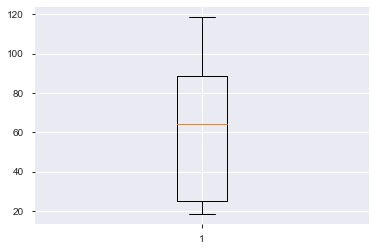

In [94]:
plt.boxplot(df[df['churn']==0]['monthly_charges'])

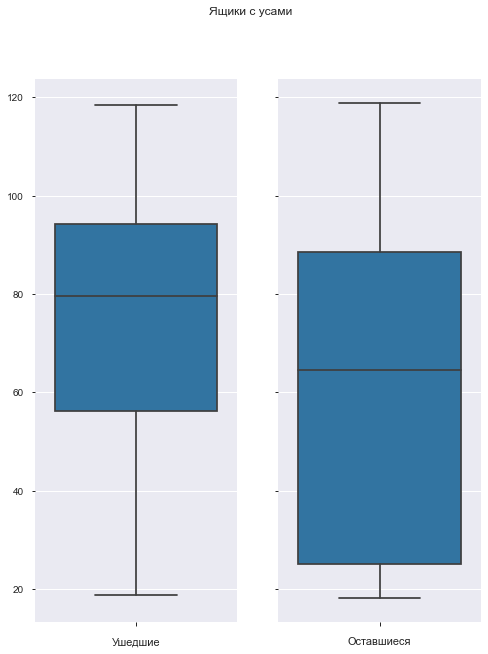

In [95]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 10), sharey=True)
sns.boxplot(data=df[df['churn']==1], y='monthly_charges', ax=ax1)
sns.boxplot(data=df[df['churn']==0], y='monthly_charges', ax=ax2)

ax1.set_xlabel('Ушедшие'), ax1.set_ylabel('')
ax2.set_xlabel('Оставшиеся'), ax2.set_ylabel('')
plt.suptitle(
    'Ящики с усами')
plt.show()

Выбросов не обнаружено. Но можно видеть, что среднее значение платежа у ушедших больше. Также можно отметить, что у оставшихся разброс значений платежа большой, в то время, как у ушедщих значения ежемесячного платежа более компактны. 

Построим гистограммы платежей у ушедших и оставшихся клиентов. Для этого напишем отдельную функцию.  

In [96]:
def phist(i, st, text_pay, text_client):
    df[df['churn']==i][st].hist()
    plt.xlabel( text_pay)
    plt.ylabel('Количество клиентов')
    plt.title(f'Платежи {text_client} клиентов')
    plt.show() 

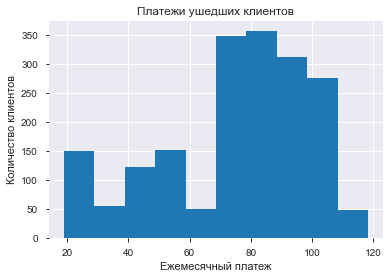

In [97]:
phist(1, 'monthly_charges', 'Ежемесячный платеж',  'ушедших')

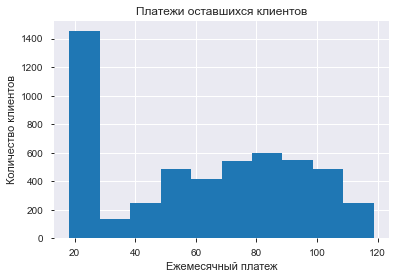

In [98]:
phist(0, 'monthly_charges', 'Ежемесячный платеж',  'оставшихся')

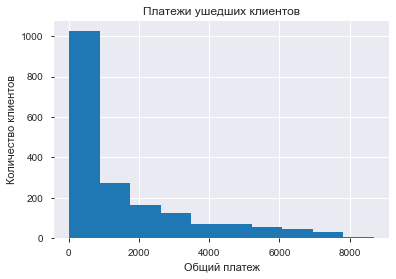

In [99]:
phist(1, 'total_charges', 'Общий платеж',  'ушедших')

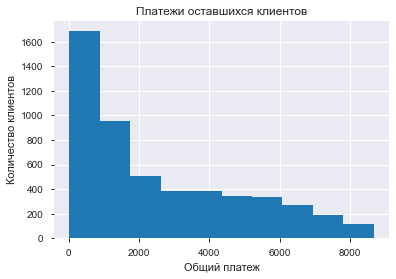

In [100]:
phist(0, 'total_charges', 'Общий платеж',  'оставшихся')

В целом, гистограммы подтвердили наши выводы из ящиков с усами. 

Таким образом, не вижу поводов для корректировки df. А df_cat мы использовали для удобства. 

На мой взгляд, конкретные даты начала и конца конктрата не так уж важны. А дату конца точно надо убирать, тк это "слив" информации. Эти стобцы удаляем. Также удалим 'total_charges', так как он коррелирует с ежемесячным платежем. 

In [101]:
df = df.drop(columns = ['end_date','begin_date','total_charges'], axis = 1)

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             7032 non-null   object 
 1   senior_citizen     7032 non-null   int64  
 2   partner            7032 non-null   object 
 3   dependents         7032 non-null   object 
 4   type               7032 non-null   object 
 5   paperless_billing  7032 non-null   object 
 6   payment_method     7032 non-null   object 
 7   monthly_charges    7032 non-null   float64
 8   churn              7032 non-null   int64  
 9   days               7032 non-null   int64  
 10  internet_service   7032 non-null   object 
 11  online_security    7032 non-null   object 
 12  online_backup      7032 non-null   object 
 13  device_protection  7032 non-null   object 
 14  tech_support       7032 non-null   object 
 15  streaming_tv       7032 non-null   object 
 16  streaming_movi

##### Удаление дубликатов

In [103]:
df = df.drop_duplicates().reset_index(drop = True)

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7009 entries, 0 to 7008
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             7009 non-null   object 
 1   senior_citizen     7009 non-null   int64  
 2   partner            7009 non-null   object 
 3   dependents         7009 non-null   object 
 4   type               7009 non-null   object 
 5   paperless_billing  7009 non-null   object 
 6   payment_method     7009 non-null   object 
 7   monthly_charges    7009 non-null   float64
 8   churn              7009 non-null   int64  
 9   days               7009 non-null   int64  
 10  internet_service   7009 non-null   object 
 11  online_security    7009 non-null   object 
 12  online_backup      7009 non-null   object 
 13  device_protection  7009 non-null   object 
 14  tech_support       7009 non-null   object 
 15  streaming_tv       7009 non-null   object 
 16  streaming_movies   7009 

### Вывод

Таким образом, исходя из выше проведенного исследовательского анализа данных, для клиента, который уйдет характерны следующие признаки: 

0. Он пришел к пройвайдеру в последние несколько лет.
1. Он пользуется интернетом. 
2. Интернетом он пользуется по оптоволокну.
3. По мимо интернета он также пользуется телефонией с возможностью многоканальных звонков. 
4. Он скорее пенсионер. =)

Благодаря проведенному анализу, мы попытались нарисовать портрет типичного клиента, который уйдет. 

Что касается подготовки данных к последующему обучению моделей, то, согласно плану:
1. столбцы были приведены к змеиному регистру,
2. данные были очищены от пропусков,
3. выбросов в количественных признаках найдено не было,
4. был добавлен столбец days (срок жизни клиента в днях), 
5. было произведено изменение типов данных, в частности дат,
6. просмотр распределения данных был произведен на количественных признаках,
7. столбцы с датами были удалены, так как из-за них происходит утечка данных,
8. дубликаты удалены,
9. в итоге была получена склеиная их четырех исходных таблица, готовая к использованию в дальнейшем машинном обучении,
10. в конце были удалены дубликаты.


## Предобработка данных перед обучением

### Кодирование категориальных признаков

In [105]:
df.head(3)

,gender,senior_citizen,partner,dependents,type,paperless_billing,payment_method,monthly_charges,churn,days,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines
0,Female,0,Yes,No,Month-to-month,Yes,Electronic check,29.85,0,31,DSL,No,Yes,No,No,No,No,Unknown
1,Male,0,No,No,One year,No,Mailed check,56.95,0,1036,DSL,Yes,No,Yes,No,No,No,No
2,Male,0,No,No,Month-to-month,Yes,Mailed check,53.85,1,61,DSL,Yes,Yes,No,No,No,No,No


Так как планируем использовать разные модели для обучения, в том числе и линейные, такие как логистическая регресиия, то нельзя использовать технику OrdinalEncoder. Будеи использовать OHE, убирая первый признак. 

In [106]:
df = pd.get_dummies(df,drop_first=True)
print(df.head())
df.info()

   senior_citizen  monthly_charges  churn  days  gender_Male  partner_Yes  \
0               0            29.85      0    31            0            1   
1               0            56.95      0  1036            1            0   
2               0            53.85      1    61            1            0   
3               0            42.30      0  1371            1            0   
4               0            70.70      1    61            0            0   

   dependents_Yes  type_One year  type_Two year  paperless_billing_Yes  ...  \
0               0              0              0                      1  ...   
1               0              1              0                      0  ...   
2               0              0              0                      1  ...   
3               0              1              0                      0  ...   
4               0              0              0                      1  ...   

   internet_service_Fiber optic  internet_service_No  online_s

### Проверка признаков на взаимную корреляцию

In [107]:
features = df.drop(['churn'], axis=1)
target = df['churn']

Проверим, есть ли корреляция между признаками. Будем смотреть на коэффициент Phik.

In [108]:
df.head(2)

,senior_citizen,monthly_charges,churn,days,gender_Male,partner_Yes,dependents_Yes,type_One year,type_Two year,paperless_billing_Yes,...,internet_service_Fiber optic,internet_service_No,online_security_Yes,online_backup_Yes,device_protection_Yes,tech_support_Yes,streaming_tv_Yes,streaming_movies_Yes,multiple_lines_Unknown,multiple_lines_Yes
0,0,29.85,0,31,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
1,0,56.95,0,1036,1,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0


In [109]:
interval_cols = ['monthly_charges','days']
phik_overview = features.phik_matrix(interval_cols=interval_cols)

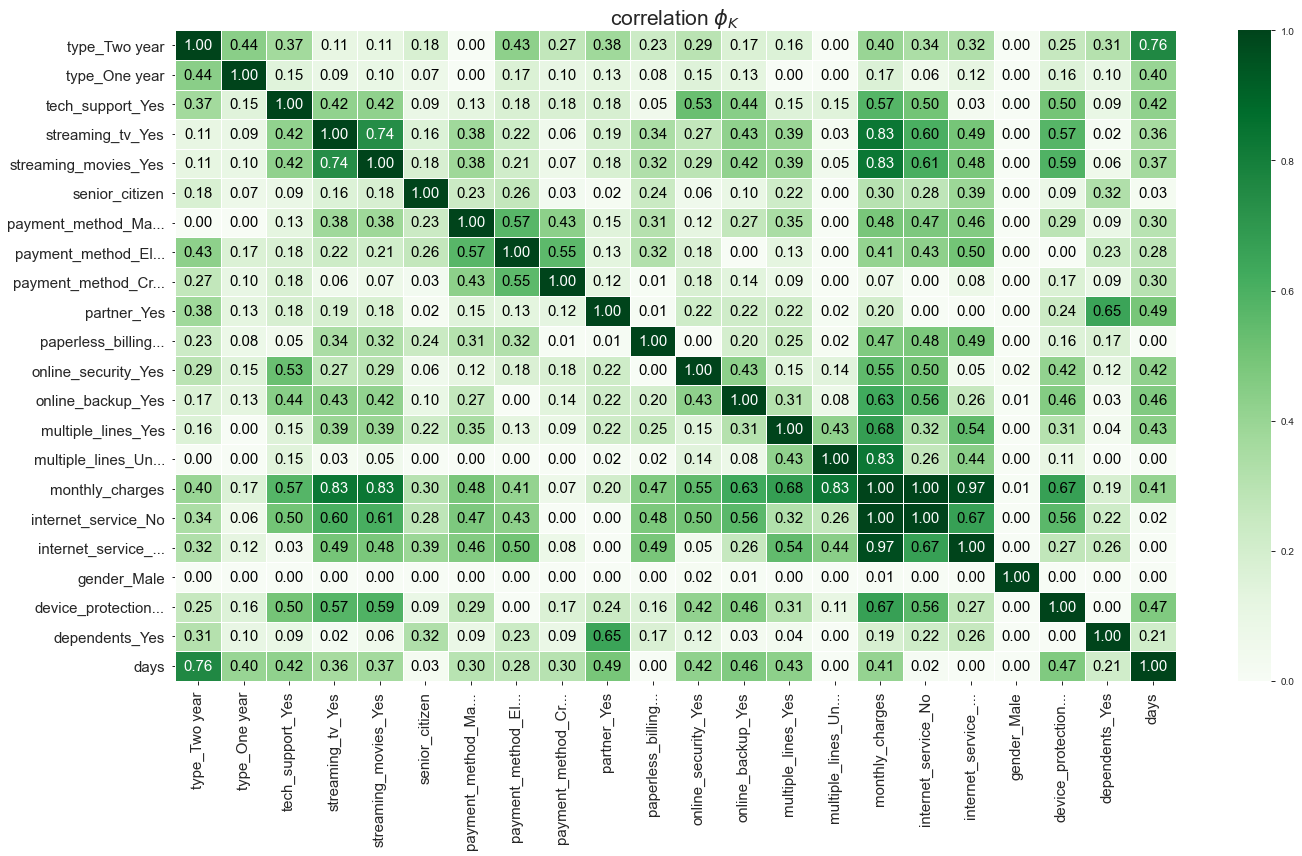

In [110]:
plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map="Greens", 
                        title=r"correlation $\phi_K$", 
                        fontsize_factor=1.5, 
                            figsize=(20, 12))
plt.tight_layout()

Удалим столбцы с большой корреляцией. 

In [111]:
features = features.drop(['internet_service_Fiber optic', 'streaming_tv_Yes', 'streaming_movies_Yes', 'multiple_lines_Unknown', 'internet_service_No'], axis=1)
target = df['churn']

In [112]:
interval_cols = ['monthly_charges','days']
phik_overview = features.phik_matrix(interval_cols=interval_cols)

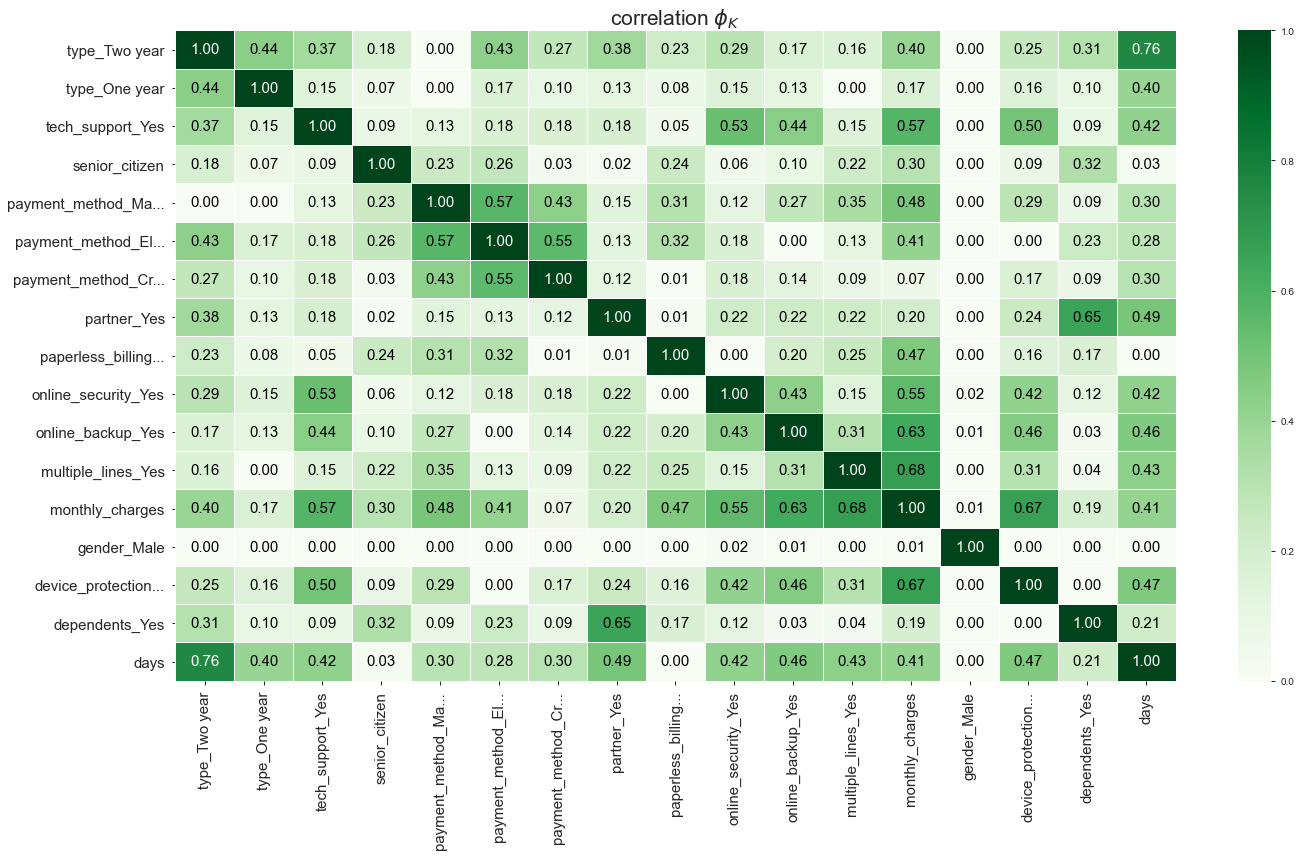

In [113]:
plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map="Greens", 
                        title=r"correlation $\phi_K$", 
                        fontsize_factor=1.5, 
                        figsize=(20, 12))
plt.tight_layout()

In [114]:
interval_cols = ['monthly_charges']
phik_overview = features.phik_matrix(interval_cols=interval_cols)

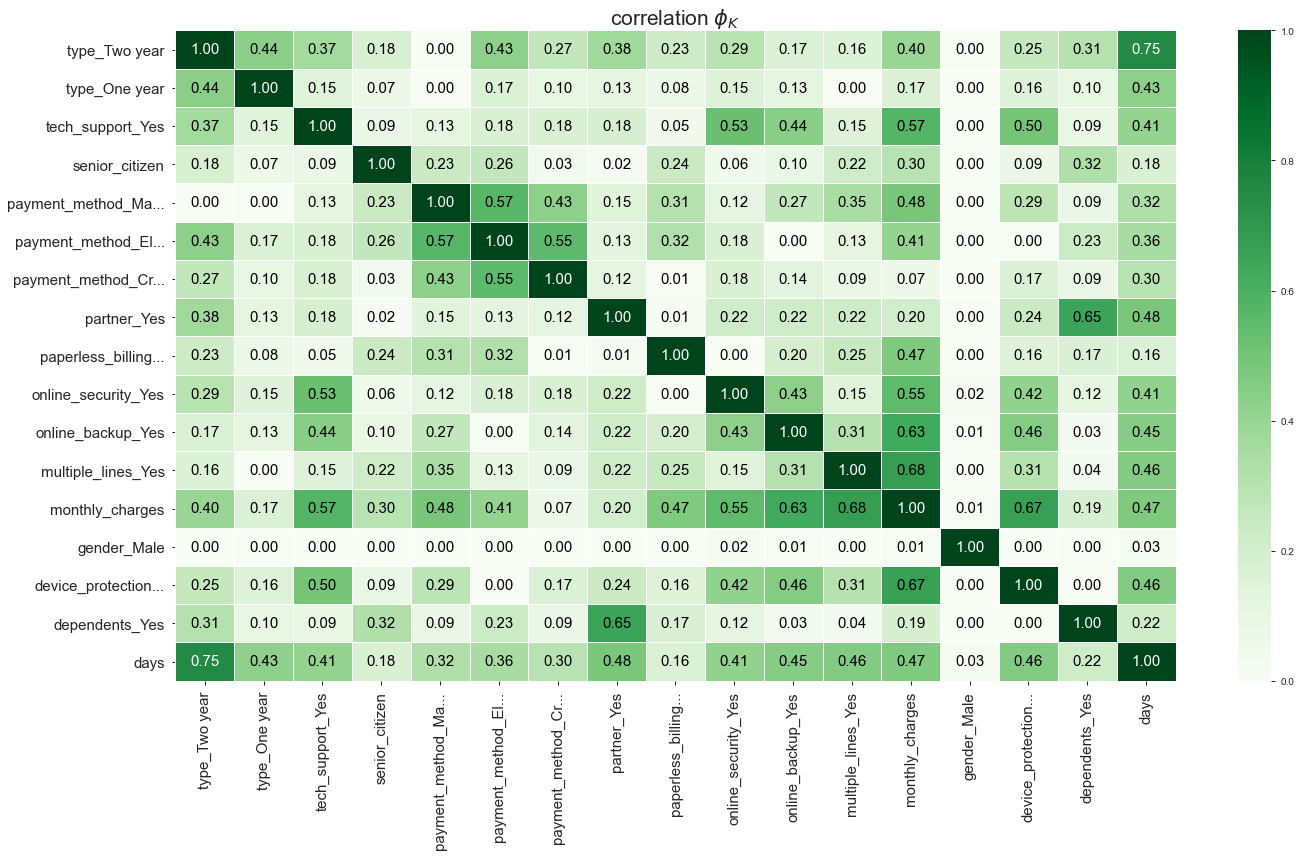

In [115]:
plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map="Greens", 
                        title=r"correlation $\phi_K$", 
                        fontsize_factor=1.5, 
                        figsize=(20, 12))
plt.tight_layout()

In [116]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7009 entries, 0 to 7008
Data columns (total 17 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   senior_citizen                          7009 non-null   int64  
 1   monthly_charges                         7009 non-null   float64
 2   days                                    7009 non-null   int64  
 3   gender_Male                             7009 non-null   uint8  
 4   partner_Yes                             7009 non-null   uint8  
 5   dependents_Yes                          7009 non-null   uint8  
 6   type_One year                           7009 non-null   uint8  
 7   type_Two year                           7009 non-null   uint8  
 8   paperless_billing_Yes                   7009 non-null   uint8  
 9   payment_method_Credit card (automatic)  7009 non-null   uint8  
 10  payment_method_Electronic check         7009 non-null   uint

### Разделение на обучающую и тестовую выборки

Разделим выборку на обучающую и тестовую для использования в общей функции в отношении 4:1 (def algorithm_pipeline_3)

In [117]:
features_train, features_test, target_train, target_test = train_test_split(
                                                        features,  target, test_size=0.2, random_state=250722, stratify=target)

Проверим корректность разделения исходных данных на выборки.

In [118]:
features_train.shape, features_test.shape, 

((5607, 17), (1402, 17))

Разделение выполнено корректно. 
Проверим баланс классов.

In [119]:
target_train.mean(), target_test.mean()

(0.2655609060103442, 0.2653352353780314)

Баланс классов равный благодаря параметру stratify. Чего и следовало ожидать. 

### Масштабирование признаков

Произведем масштабирование признаков. Мной были испробованы три варинта: StandardScaler, MinMaxScaler и RobustScaler. Однако по моей субъективной оценке, полученной исключительно эмпирическим путем, наилучший результат все-таки дает старый добрый  StandardScaler. 

In [120]:
numeric = ['monthly_charges', 'days']
scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

print(features_train.head(10)) 

      senior_citizen  monthly_charges      days  gender_Male  partner_Yes  \
2613               0         0.466521  1.564370            1            1   
5846               0        -0.312023 -0.355689            1            0   
2029               1         0.184319 -1.292270            0            0   
1462               0         0.288900 -0.393206            0            0   
1783               0         0.433321 -0.844748            0            0   
550                0         1.678326  1.601887            0            1   
4293               0        -0.479684 -0.434742            0            0   
3600               1        -0.497944  0.911845            1            0   
3789               0         0.964523  1.154365            1            1   
5526               0         1.090684 -1.210537            0            0   

      dependents_Yes  type_One year  type_Two year  paperless_billing_Yes  \
2613               0              0              1                      1  

### Вывод 

Данные готовы к дальнейшей работе с ними: 

1. категориальные признаки преобразованы в численные техникой OHE
2. определен целевой признак 'churn',
3. произведено разбиение на обучающую и тестовую выборки в отношении 4:1,
4. выполнено масштабирование признаков
5. построена матрица корреляции с использованием коэффициента Phik.

## Обучение моделей

### Поиск гиперпараметров модели с помощью RandomizedSearchCV

In [121]:
#зафиксируем значение генератора случайных чисел для воспроизводимости
seed = 250722

Создадим общую функцию для подбора гиперпараметров моделей. Функция получает на вход параметры, модель, оценщиков (в нашем случае будем смотреть сразу три оценки: 'accuracy', 'f1', 'roc_auc'. Но главная метрика для нас - ROC-AUC. 
Функция выводит обученную модель, оценку на обучающей выборке и наилучшиме параметры модели. 

Создадим такблицу для записи получившихся метрик. 

In [122]:
# функция подсчета времени
def exec_time(start, end):
    diff_time = end - start
    m, s = divmod(diff_time, 60)
    h, m = divmod(m, 60)
    s,m,h = int(round(s, 0)), int(round(m, 0)), int(round(h, 0))
    time_in_sec = h * 60 * 60 + m *60 + s
    print("Execution Time: " + "{0:02d}:{1:02d}:{2:02d}".format(h, m, s))
    return time_in_sec

In [123]:
def model_test(mdl, param, name_mld):
    
    ''' 
    Функция обучение модели:
    param mdl: получает алгоритм обучения модели;
    param param: параметры для обучения;
    param name_mld: название алгоритма обучения;
    return: отсутствует, данные вносятся в df.
    '''
        
    model = mdl
    rand_research_cv = RandomizedSearchCV(estimator = model, param_distributions = param, cv=5, scoring = 'roc_auc' )
    
    # обучение модели
    start = time.time()
    rand_research_cv.fit(features_train,target_train)
    end = time.time()
    time_work = exec_time(start,end)
    
    # сохраняем лучшую модель в переменную
    best = rand_research_cv.best_estimator_
    
    # проверим работу модели на тестовых данных
    predicted_test = best.predict(features_test)
    probabilities_test = best.predict_proba(features_test)
    probabilities_one_test = probabilities_test[:, 1]
    
    # расчитаем метрики
    r_auc = roc_auc_score(target_test, probabilities_one_test)
    acc = accuracy_score(target_test, predicted_test)
    f1 = f1_score(target_test,predicted_test)
    precision = precision_score(target_test, predicted_test, pos_label= 1)
    recall = recall_score(target_test, predicted_test, pos_label=1)
    
    # добавим данные в датафрейм для дальнейшего сравнения
    #df_scor_train.append(name_mld, r_auc, acc, f1, precision, recall, time_work)
    data = {'name': [name_mld], 
            'params' : [best],
            'roc_auc': [r_auc],
            'accuracy': [acc],
            'f1': [f1],
            'precision' : [precision],
            'recall' : [recall],
            'time': [time_work]
           }
    #print(pd.DataFrame(data))
    
    #df_scor_train.append(pd.DataFrame(data), ignore_index=True)
    
    fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)
    print('\n ROC AUC:', round(r_auc,3))
    plt.figure()
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.plot(fpr, tpr)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC-кривая')
    plt.show() 
    
    return (pd.DataFrame(data))

In [124]:
df_scores = []
df_scores = pd.DataFrame(data=None,
                          index=None,
                          columns=['name', 'params', 'roc_auc', 'accuracy', 'f1', 'precision', 'recall', 'time'],
                          dtype=None,
                          copy=False)
df_scores

,name,params,roc_auc,accuracy,f1,precision,recall,time


#### RandomForestClassifier

Execution Time: 00:00:14

 ROC AUC: 0.865


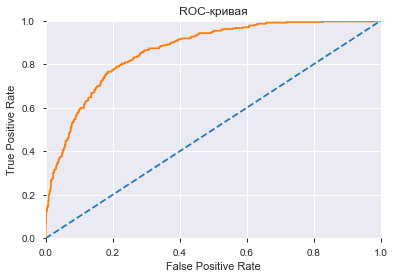

In [125]:
v = model_test(RandomForestClassifier(random_state=seed, class_weight='balanced'), 
           [{'n_estimators': range(10, 200, 5),
             'max_depth': range(10, 200, 5),
             'max_leaf_nodes': range(10, 200, 5),
             'min_samples_split' : [2,3,4],
             'criterion' : ['gini', 'entropy']}], 'RandomForestClassifier')

df_scores = df_scores.append(v, ignore_index=True)

#### DecisionTreeClassifier

Execution Time: 00:00:01

 ROC AUC: 0.853


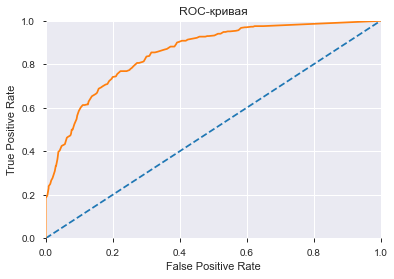

In [126]:
v = model_test(DecisionTreeClassifier(random_state=seed, class_weight='balanced'), 
           [{
    'max_depth': range(10, 200, 5),
    'min_samples_split' : [int(x) for x in np.linspace(start = 2, stop = 30, num = 15)],
    'min_samples_leaf' : [int(x) for x in np.linspace(start = 1, stop = 30, num = 15)]
           }], 
               'DecisionTreeClassifier')

df_scores = df_scores.append(v, ignore_index=True)

#### LogisticRegression

Execution Time: 00:00:03

 ROC AUC: 0.844


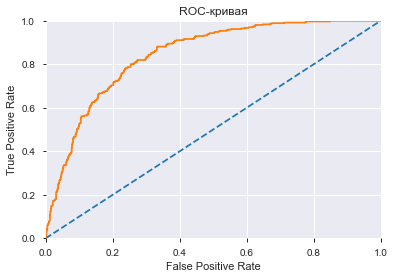

In [127]:
v = model_test(LogisticRegression(random_state=seed, class_weight='balanced'), 
           [{
    'penalty': ['l1', 'l2'],
    'C' : [0.1, 1.0, 5.0, 10.0],
    'intercept_scaling' : range(5, 100, 5),
    'solver' : ['liblinear', 'saga'],
    'max_iter' : range(5, 100, 5)
           }], 
               'LogisticRegression')

df_scores = df_scores.append(v, ignore_index=True)


#### LGBMClassifier

Execution Time: 00:00:18

 ROC AUC: 0.916


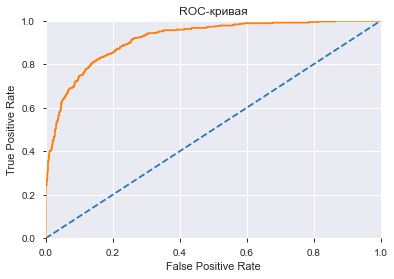

In [128]:
v = model_test(ltb.LGBMClassifier(random_state=seed, class_weight='balanced'), 
           [{
    'n_estimators': range (100, 200, 50),
    'colsample_bytree': [0.7, 0.8],
    'max_depth': range (10, 100, 20),
    'num_leaves': [50, 100, 200],
    'reg_alpha': [1.1, 1.2, 1.3],
    'reg_lambda': [1.1, 1.2, 1.3],
    'min_split_gain': [0.3, 0.4],
    'subsample': [0.7, 0.8, 0.9],
    'subsample_freq': [20]
           }], 
               'LGBMClassifier')

df_scores = df_scores.append(v, ignore_index=True)

#### CatBoostClassifier

0:	learn: 0.6824409	total: 163ms	remaining: 14.5s
1:	learn: 0.6715660	total: 167ms	remaining: 7.35s
2:	learn: 0.6618420	total: 169ms	remaining: 4.91s
3:	learn: 0.6520361	total: 173ms	remaining: 3.72s
4:	learn: 0.6421745	total: 176ms	remaining: 3s
5:	learn: 0.6331767	total: 180ms	remaining: 2.52s
6:	learn: 0.6244439	total: 183ms	remaining: 2.17s
7:	learn: 0.6161610	total: 186ms	remaining: 1.91s
8:	learn: 0.6080268	total: 189ms	remaining: 1.7s
9:	learn: 0.6007129	total: 193ms	remaining: 1.54s
10:	learn: 0.5937042	total: 196ms	remaining: 1.41s
11:	learn: 0.5862393	total: 199ms	remaining: 1.29s
12:	learn: 0.5792216	total: 202ms	remaining: 1.2s
13:	learn: 0.5727662	total: 206ms	remaining: 1.11s
14:	learn: 0.5664959	total: 209ms	remaining: 1.04s
15:	learn: 0.5606111	total: 212ms	remaining: 982ms
16:	learn: 0.5545845	total: 215ms	remaining: 925ms
17:	learn: 0.5488470	total: 218ms	remaining: 874ms
18:	learn: 0.5435355	total: 222ms	remaining: 828ms
19:	learn: 0.5386433	total: 225ms	remaining: 7

78:	learn: 0.4166883	total: 365ms	remaining: 50.8ms
79:	learn: 0.4161519	total: 371ms	remaining: 46.3ms
80:	learn: 0.4155235	total: 375ms	remaining: 41.7ms
81:	learn: 0.4147794	total: 381ms	remaining: 37.2ms
82:	learn: 0.4139287	total: 387ms	remaining: 32.6ms
83:	learn: 0.4133193	total: 392ms	remaining: 28ms
84:	learn: 0.4127328	total: 397ms	remaining: 23.4ms
85:	learn: 0.4121334	total: 402ms	remaining: 18.7ms
86:	learn: 0.4115033	total: 407ms	remaining: 14ms
87:	learn: 0.4110214	total: 413ms	remaining: 9.38ms
88:	learn: 0.4103385	total: 418ms	remaining: 4.69ms
89:	learn: 0.4098074	total: 423ms	remaining: 0us
0:	learn: 0.6821288	total: 4.79ms	remaining: 427ms
1:	learn: 0.6709555	total: 9.55ms	remaining: 420ms
2:	learn: 0.6598596	total: 14.3ms	remaining: 414ms
3:	learn: 0.6501946	total: 19.2ms	remaining: 412ms
4:	learn: 0.6411758	total: 24.1ms	remaining: 409ms
5:	learn: 0.6315485	total: 28.9ms	remaining: 405ms
6:	learn: 0.6233928	total: 34ms	remaining: 403ms
7:	learn: 0.6150394	total: 3

81:	learn: 0.4206144	total: 536ms	remaining: 52.3ms
82:	learn: 0.4200292	total: 543ms	remaining: 45.8ms
83:	learn: 0.4193860	total: 549ms	remaining: 39.2ms
84:	learn: 0.4185812	total: 556ms	remaining: 32.7ms
85:	learn: 0.4177187	total: 562ms	remaining: 26.2ms
86:	learn: 0.4171306	total: 569ms	remaining: 19.6ms
87:	learn: 0.4166370	total: 575ms	remaining: 13.1ms
88:	learn: 0.4160067	total: 581ms	remaining: 6.53ms
89:	learn: 0.4153316	total: 588ms	remaining: 0us
0:	learn: 0.6813936	total: 6.17ms	remaining: 549ms
1:	learn: 0.6708106	total: 12.6ms	remaining: 554ms
2:	learn: 0.6602379	total: 18.5ms	remaining: 537ms
3:	learn: 0.6507585	total: 24.4ms	remaining: 525ms
4:	learn: 0.6420761	total: 30.2ms	remaining: 513ms
5:	learn: 0.6323590	total: 35.9ms	remaining: 502ms
6:	learn: 0.6237968	total: 42.7ms	remaining: 507ms
7:	learn: 0.6153751	total: 49.6ms	remaining: 508ms
8:	learn: 0.6076145	total: 56.1ms	remaining: 505ms
9:	learn: 0.6004587	total: 62.3ms	remaining: 499ms
10:	learn: 0.5933144	tota

62:	learn: 0.5404580	total: 4.02s	remaining: 1.72s
63:	learn: 0.5390073	total: 4.09s	remaining: 1.66s
64:	learn: 0.5373952	total: 4.16s	remaining: 1.6s
65:	learn: 0.5359808	total: 4.22s	remaining: 1.53s
66:	learn: 0.5345679	total: 4.3s	remaining: 1.47s
67:	learn: 0.5331024	total: 4.37s	remaining: 1.41s
68:	learn: 0.5315077	total: 4.44s	remaining: 1.35s
69:	learn: 0.5300934	total: 4.51s	remaining: 1.29s
70:	learn: 0.5283127	total: 4.51s	remaining: 1.21s
71:	learn: 0.5269327	total: 4.58s	remaining: 1.15s
72:	learn: 0.5257337	total: 4.66s	remaining: 1.08s
73:	learn: 0.5244142	total: 4.73s	remaining: 1.02s
74:	learn: 0.5230023	total: 4.8s	remaining: 961ms
75:	learn: 0.5214048	total: 4.88s	remaining: 899ms
76:	learn: 0.5200474	total: 4.95s	remaining: 836ms
77:	learn: 0.5186569	total: 5.02s	remaining: 773ms
78:	learn: 0.5174253	total: 5.09s	remaining: 709ms
79:	learn: 0.5160704	total: 5.13s	remaining: 641ms
80:	learn: 0.5146689	total: 5.14s	remaining: 571ms
81:	learn: 0.5131573	total: 5.21s	

44:	learn: 0.5766843	total: 3.08s	remaining: 3.08s
45:	learn: 0.5746933	total: 3.15s	remaining: 3.02s
46:	learn: 0.5727899	total: 3.22s	remaining: 2.95s
47:	learn: 0.5710837	total: 3.29s	remaining: 2.88s
48:	learn: 0.5694924	total: 3.37s	remaining: 2.81s
49:	learn: 0.5676672	total: 3.44s	remaining: 2.75s
50:	learn: 0.5657943	total: 3.51s	remaining: 2.68s
51:	learn: 0.5640119	total: 3.58s	remaining: 2.62s
52:	learn: 0.5619609	total: 3.65s	remaining: 2.55s
53:	learn: 0.5601586	total: 3.71s	remaining: 2.48s
54:	learn: 0.5581944	total: 3.78s	remaining: 2.41s
55:	learn: 0.5562075	total: 3.79s	remaining: 2.3s
56:	learn: 0.5545303	total: 3.86s	remaining: 2.23s
57:	learn: 0.5529696	total: 3.94s	remaining: 2.17s
58:	learn: 0.5513313	total: 4s	remaining: 2.1s
59:	learn: 0.5494689	total: 4.01s	remaining: 2s
60:	learn: 0.5477291	total: 4.08s	remaining: 1.94s
61:	learn: 0.5462297	total: 4.15s	remaining: 1.87s
62:	learn: 0.5444673	total: 4.16s	remaining: 1.78s
63:	learn: 0.5432268	total: 4.23s	remai

29:	learn: 0.6097632	total: 1.81s	remaining: 3.62s
30:	learn: 0.6075954	total: 1.87s	remaining: 3.55s
31:	learn: 0.6051074	total: 1.92s	remaining: 3.49s
32:	learn: 0.6027855	total: 1.98s	remaining: 3.42s
33:	learn: 0.6006475	total: 2.04s	remaining: 3.36s
34:	learn: 0.5984411	total: 2.1s	remaining: 3.29s
35:	learn: 0.5961655	total: 2.15s	remaining: 3.22s
36:	learn: 0.5939465	total: 2.2s	remaining: 3.15s
37:	learn: 0.5917566	total: 2.25s	remaining: 3.08s
38:	learn: 0.5898676	total: 2.3s	remaining: 3.01s
39:	learn: 0.5874626	total: 2.31s	remaining: 2.89s
40:	learn: 0.5850897	total: 2.34s	remaining: 2.79s
41:	learn: 0.5830213	total: 2.39s	remaining: 2.73s
42:	learn: 0.5811581	total: 2.44s	remaining: 2.67s
43:	learn: 0.5795810	total: 2.5s	remaining: 2.61s
44:	learn: 0.5775512	total: 2.5s	remaining: 2.5s
45:	learn: 0.5754479	total: 2.54s	remaining: 2.43s
46:	learn: 0.5736824	total: 2.59s	remaining: 2.37s
47:	learn: 0.5719728	total: 2.64s	remaining: 2.31s
48:	learn: 0.5697322	total: 2.65s	rem

1:	learn: 0.6857901	total: 25.4ms	remaining: 609ms
2:	learn: 0.6819627	total: 36.2ms	remaining: 568ms
3:	learn: 0.6783278	total: 47.1ms	remaining: 541ms
4:	learn: 0.6750218	total: 57.9ms	remaining: 521ms
5:	learn: 0.6712971	total: 67.4ms	remaining: 494ms
6:	learn: 0.6678051	total: 77.3ms	remaining: 475ms
7:	learn: 0.6644564	total: 86.5ms	remaining: 454ms
8:	learn: 0.6610022	total: 96.2ms	remaining: 438ms
9:	learn: 0.6578395	total: 106ms	remaining: 424ms
10:	learn: 0.6548368	total: 115ms	remaining: 408ms
11:	learn: 0.6518298	total: 124ms	remaining: 393ms
12:	learn: 0.6486378	total: 128ms	remaining: 364ms
13:	learn: 0.6453025	total: 137ms	remaining: 352ms
14:	learn: 0.6424681	total: 146ms	remaining: 341ms
15:	learn: 0.6394182	total: 156ms	remaining: 331ms
16:	learn: 0.6361710	total: 165ms	remaining: 321ms
17:	learn: 0.6331593	total: 175ms	remaining: 310ms
18:	learn: 0.6301941	total: 184ms	remaining: 300ms
19:	learn: 0.6274133	total: 193ms	remaining: 290ms
20:	learn: 0.6247400	total: 202m

15:	learn: 0.5712731	total: 775ms	remaining: 1.65s
16:	learn: 0.5662656	total: 828ms	remaining: 1.61s
17:	learn: 0.5610864	total: 883ms	remaining: 1.57s
18:	learn: 0.5549952	total: 935ms	remaining: 1.52s
19:	learn: 0.5492781	total: 990ms	remaining: 1.48s
20:	learn: 0.5449404	total: 1.05s	remaining: 1.45s
21:	learn: 0.5397986	total: 1.1s	remaining: 1.4s
22:	learn: 0.5349447	total: 1.15s	remaining: 1.35s
23:	learn: 0.5300566	total: 1.2s	remaining: 1.3s
24:	learn: 0.5255661	total: 1.25s	remaining: 1.25s
25:	learn: 0.5224744	total: 1.29s	remaining: 1.19s
26:	learn: 0.5179939	total: 1.32s	remaining: 1.13s
27:	learn: 0.5143008	total: 1.37s	remaining: 1.08s
28:	learn: 0.5094681	total: 1.43s	remaining: 1.04s
29:	learn: 0.5058560	total: 1.47s	remaining: 977ms
30:	learn: 0.5020809	total: 1.53s	remaining: 939ms
31:	learn: 0.4986603	total: 1.6s	remaining: 899ms
32:	learn: 0.4946117	total: 1.63s	remaining: 841ms
33:	learn: 0.4905876	total: 1.64s	remaining: 773ms
34:	learn: 0.4866750	total: 1.71s	re

32:	learn: 0.5026762	total: 1.43s	remaining: 736ms
33:	learn: 0.5000122	total: 1.48s	remaining: 699ms
34:	learn: 0.4967000	total: 1.54s	remaining: 660ms
35:	learn: 0.4939969	total: 1.6s	remaining: 622ms
36:	learn: 0.4909884	total: 1.65s	remaining: 580ms
37:	learn: 0.4883501	total: 1.71s	remaining: 539ms
38:	learn: 0.4847208	total: 1.71s	remaining: 483ms
39:	learn: 0.4819686	total: 1.77s	remaining: 443ms
40:	learn: 0.4799334	total: 1.83s	remaining: 401ms
41:	learn: 0.4768937	total: 1.89s	remaining: 360ms
42:	learn: 0.4746130	total: 1.95s	remaining: 317ms
43:	learn: 0.4726597	total: 2s	remaining: 273ms
44:	learn: 0.4703193	total: 2.06s	remaining: 229ms
45:	learn: 0.4680335	total: 2.11s	remaining: 184ms
46:	learn: 0.4659660	total: 2.14s	remaining: 137ms
47:	learn: 0.4639758	total: 2.2s	remaining: 91.8ms
48:	learn: 0.4614632	total: 2.27s	remaining: 46.3ms
49:	learn: 0.4589483	total: 2.27s	remaining: 0us
0:	learn: 0.6826913	total: 63.3ms	remaining: 3.1s
1:	learn: 0.6732082	total: 126ms	rema

94:	learn: 0.3920720	total: 1m 3s	remaining: 10.1s
95:	learn: 0.3910647	total: 1m 4s	remaining: 9.38s
96:	learn: 0.3898721	total: 1m 4s	remaining: 8.7s
97:	learn: 0.3888313	total: 1m 5s	remaining: 8.02s
98:	learn: 0.3877063	total: 1m 6s	remaining: 7.34s
99:	learn: 0.3865399	total: 1m 6s	remaining: 6.66s
100:	learn: 0.3853375	total: 1m 7s	remaining: 5.99s
101:	learn: 0.3843286	total: 1m 7s	remaining: 5.31s
102:	learn: 0.3832720	total: 1m 8s	remaining: 4.64s
103:	learn: 0.3823321	total: 1m 8s	remaining: 3.98s
104:	learn: 0.3814398	total: 1m 9s	remaining: 3.31s
105:	learn: 0.3804377	total: 1m 10s	remaining: 2.65s
106:	learn: 0.3792829	total: 1m 10s	remaining: 1.98s
107:	learn: 0.3782946	total: 1m 11s	remaining: 1.32s
108:	learn: 0.3773616	total: 1m 11s	remaining: 660ms
109:	learn: 0.3752929	total: 1m 12s	remaining: 0us
0:	learn: 0.6853462	total: 488ms	remaining: 53.2s
1:	learn: 0.6799172	total: 1.12s	remaining: 1m
2:	learn: 0.6718883	total: 1.86s	remaining: 1m 6s
3:	learn: 0.6623034	total

37:	learn: 0.5021917	total: 18.9s	remaining: 35.8s
38:	learn: 0.4979992	total: 18.9s	remaining: 34.4s
39:	learn: 0.4951000	total: 19.6s	remaining: 34.3s
40:	learn: 0.4926273	total: 20.3s	remaining: 34.1s
41:	learn: 0.4901739	total: 21s	remaining: 33.9s
42:	learn: 0.4884628	total: 21.6s	remaining: 33.7s
43:	learn: 0.4851177	total: 22.4s	remaining: 33.5s
44:	learn: 0.4829723	total: 23.1s	remaining: 33.4s
45:	learn: 0.4803853	total: 23.8s	remaining: 33.2s
46:	learn: 0.4787541	total: 24.5s	remaining: 32.9s
47:	learn: 0.4763938	total: 25.2s	remaining: 32.6s
48:	learn: 0.4736004	total: 26s	remaining: 32.3s
49:	learn: 0.4714306	total: 26.8s	remaining: 32.1s
50:	learn: 0.4693743	total: 27.5s	remaining: 31.8s
51:	learn: 0.4668373	total: 28.2s	remaining: 31.4s
52:	learn: 0.4653499	total: 28.8s	remaining: 31s
53:	learn: 0.4632993	total: 29.4s	remaining: 30.5s
54:	learn: 0.4596544	total: 29.5s	remaining: 29.5s
55:	learn: 0.4579614	total: 30.1s	remaining: 29s
56:	learn: 0.4562195	total: 30.8s	remai

89:	learn: 0.4062885	total: 52.4s	remaining: 11.6s
90:	learn: 0.4050547	total: 53.1s	remaining: 11.1s
91:	learn: 0.4040401	total: 53.8s	remaining: 10.5s
92:	learn: 0.4027988	total: 54.5s	remaining: 9.96s
93:	learn: 0.4017930	total: 55.2s	remaining: 9.39s
94:	learn: 0.4006169	total: 55.8s	remaining: 8.82s
95:	learn: 0.3991669	total: 56.5s	remaining: 8.24s
96:	learn: 0.3977586	total: 57s	remaining: 7.64s
97:	learn: 0.3961264	total: 57s	remaining: 6.98s
98:	learn: 0.3944530	total: 57s	remaining: 6.34s
99:	learn: 0.3934297	total: 57.7s	remaining: 5.77s
100:	learn: 0.3918497	total: 57.7s	remaining: 5.14s
101:	learn: 0.3908341	total: 58.3s	remaining: 4.57s
102:	learn: 0.3898224	total: 58.8s	remaining: 4s
103:	learn: 0.3888532	total: 59.4s	remaining: 3.42s
104:	learn: 0.3879298	total: 59.9s	remaining: 2.85s
105:	learn: 0.3868680	total: 1m	remaining: 2.28s
106:	learn: 0.3858080	total: 1m	remaining: 1.71s
107:	learn: 0.3848890	total: 1m 1s	remaining: 1.14s
108:	learn: 0.3838629	total: 1m 2s	rem

31:	learn: 0.4883088	total: 202ms	remaining: 366ms
32:	learn: 0.4849387	total: 208ms	remaining: 359ms
33:	learn: 0.4819314	total: 214ms	remaining: 353ms
34:	learn: 0.4790491	total: 220ms	remaining: 346ms
35:	learn: 0.4763404	total: 226ms	remaining: 340ms
36:	learn: 0.4734846	total: 232ms	remaining: 333ms
37:	learn: 0.4708255	total: 238ms	remaining: 326ms
38:	learn: 0.4679267	total: 243ms	remaining: 318ms
39:	learn: 0.4649258	total: 247ms	remaining: 309ms
40:	learn: 0.4624237	total: 253ms	remaining: 302ms
41:	learn: 0.4600199	total: 258ms	remaining: 295ms
42:	learn: 0.4575941	total: 263ms	remaining: 288ms
43:	learn: 0.4554001	total: 267ms	remaining: 279ms
44:	learn: 0.4528003	total: 272ms	remaining: 272ms
45:	learn: 0.4506525	total: 278ms	remaining: 266ms
46:	learn: 0.4487379	total: 284ms	remaining: 260ms
47:	learn: 0.4464505	total: 290ms	remaining: 254ms
48:	learn: 0.4443476	total: 297ms	remaining: 248ms
49:	learn: 0.4420449	total: 303ms	remaining: 243ms
50:	learn: 0.4399793	total: 310

25:	learn: 0.5133446	total: 282ms	remaining: 694ms
26:	learn: 0.5095909	total: 291ms	remaining: 679ms
27:	learn: 0.5059573	total: 300ms	remaining: 665ms
28:	learn: 0.5019896	total: 309ms	remaining: 650ms
29:	learn: 0.4987168	total: 318ms	remaining: 636ms
30:	learn: 0.4951459	total: 326ms	remaining: 621ms
31:	learn: 0.4920551	total: 335ms	remaining: 607ms
32:	learn: 0.4887531	total: 343ms	remaining: 592ms
33:	learn: 0.4859212	total: 352ms	remaining: 580ms
34:	learn: 0.4827390	total: 360ms	remaining: 566ms
35:	learn: 0.4802197	total: 369ms	remaining: 553ms
36:	learn: 0.4773474	total: 377ms	remaining: 540ms
37:	learn: 0.4748314	total: 385ms	remaining: 526ms
38:	learn: 0.4720502	total: 393ms	remaining: 514ms
39:	learn: 0.4691185	total: 398ms	remaining: 498ms
40:	learn: 0.4667465	total: 407ms	remaining: 486ms
41:	learn: 0.4643915	total: 415ms	remaining: 474ms
42:	learn: 0.4621214	total: 423ms	remaining: 462ms
43:	learn: 0.4596469	total: 431ms	remaining: 450ms
44:	learn: 0.4576038	total: 440

7:	learn: 0.6174390	total: 82.4ms	remaining: 845ms
8:	learn: 0.6091869	total: 92.9ms	remaining: 836ms
9:	learn: 0.6015955	total: 104ms	remaining: 828ms
10:	learn: 0.5951070	total: 115ms	remaining: 823ms
11:	learn: 0.5890248	total: 126ms	remaining: 818ms
12:	learn: 0.5828836	total: 136ms	remaining: 808ms
13:	learn: 0.5764975	total: 144ms	remaining: 783ms
14:	learn: 0.5703996	total: 154ms	remaining: 772ms
15:	learn: 0.5640686	total: 165ms	remaining: 761ms
16:	learn: 0.5590110	total: 174ms	remaining: 749ms
17:	learn: 0.5531969	total: 185ms	remaining: 739ms
18:	learn: 0.5480025	total: 195ms	remaining: 730ms
19:	learn: 0.5425585	total: 206ms	remaining: 721ms
20:	learn: 0.5374948	total: 216ms	remaining: 711ms
21:	learn: 0.5328334	total: 227ms	remaining: 701ms
22:	learn: 0.5288153	total: 237ms	remaining: 691ms
23:	learn: 0.5246141	total: 248ms	remaining: 682ms
24:	learn: 0.5202044	total: 259ms	remaining: 673ms
25:	learn: 0.5158240	total: 270ms	remaining: 666ms
26:	learn: 0.5123174	total: 282m

85:	learn: 0.5006983	total: 404ms	remaining: 113ms
86:	learn: 0.4994875	total: 410ms	remaining: 108ms
87:	learn: 0.4984326	total: 416ms	remaining: 104ms
88:	learn: 0.4971451	total: 420ms	remaining: 99.1ms
89:	learn: 0.4961000	total: 426ms	remaining: 94.6ms
90:	learn: 0.4948920	total: 431ms	remaining: 90.1ms
91:	learn: 0.4937577	total: 436ms	remaining: 85.4ms
92:	learn: 0.4928007	total: 442ms	remaining: 80.9ms
93:	learn: 0.4916384	total: 448ms	remaining: 76.2ms
94:	learn: 0.4906446	total: 453ms	remaining: 71.5ms
95:	learn: 0.4894616	total: 458ms	remaining: 66.9ms
96:	learn: 0.4884573	total: 464ms	remaining: 62.2ms
97:	learn: 0.4874208	total: 469ms	remaining: 57.5ms
98:	learn: 0.4863370	total: 475ms	remaining: 52.8ms
99:	learn: 0.4853775	total: 480ms	remaining: 48ms
100:	learn: 0.4843819	total: 486ms	remaining: 43.3ms
101:	learn: 0.4833758	total: 491ms	remaining: 38.5ms
102:	learn: 0.4824533	total: 496ms	remaining: 33.7ms
103:	learn: 0.4814384	total: 501ms	remaining: 28.9ms
104:	learn: 0

39:	learn: 0.5770340	total: 237ms	remaining: 415ms
40:	learn: 0.5750704	total: 245ms	remaining: 412ms
41:	learn: 0.5730464	total: 251ms	remaining: 406ms
42:	learn: 0.5710869	total: 257ms	remaining: 400ms
43:	learn: 0.5689408	total: 263ms	remaining: 394ms
44:	learn: 0.5668313	total: 269ms	remaining: 388ms
45:	learn: 0.5650681	total: 274ms	remaining: 382ms
46:	learn: 0.5630143	total: 280ms	remaining: 375ms
47:	learn: 0.5611095	total: 286ms	remaining: 369ms
48:	learn: 0.5590634	total: 291ms	remaining: 363ms
49:	learn: 0.5571343	total: 297ms	remaining: 357ms
50:	learn: 0.5552385	total: 303ms	remaining: 351ms
51:	learn: 0.5532896	total: 309ms	remaining: 345ms
52:	learn: 0.5514952	total: 315ms	remaining: 339ms
53:	learn: 0.5496352	total: 321ms	remaining: 333ms
54:	learn: 0.5479012	total: 328ms	remaining: 328ms
55:	learn: 0.5460911	total: 334ms	remaining: 322ms
56:	learn: 0.5442813	total: 340ms	remaining: 316ms
57:	learn: 0.5425485	total: 346ms	remaining: 310ms
58:	learn: 0.5409326	total: 352

91:	learn: 0.5000016	total: 560ms	remaining: 110ms
92:	learn: 0.4988937	total: 566ms	remaining: 103ms
93:	learn: 0.4978151	total: 572ms	remaining: 97.4ms
94:	learn: 0.4968566	total: 578ms	remaining: 91.2ms
95:	learn: 0.4957159	total: 584ms	remaining: 85.1ms
96:	learn: 0.4947571	total: 589ms	remaining: 79ms
97:	learn: 0.4938577	total: 596ms	remaining: 72.9ms
98:	learn: 0.4929271	total: 601ms	remaining: 66.8ms
99:	learn: 0.4919848	total: 607ms	remaining: 60.7ms
100:	learn: 0.4909494	total: 613ms	remaining: 54.6ms
101:	learn: 0.4900212	total: 619ms	remaining: 48.6ms
102:	learn: 0.4891708	total: 626ms	remaining: 42.5ms
103:	learn: 0.4882135	total: 632ms	remaining: 36.5ms
104:	learn: 0.4873363	total: 638ms	remaining: 30.4ms
105:	learn: 0.4865056	total: 644ms	remaining: 24.3ms
106:	learn: 0.4854907	total: 650ms	remaining: 18.2ms
107:	learn: 0.4845506	total: 655ms	remaining: 12.1ms
108:	learn: 0.4837058	total: 661ms	remaining: 6.07ms
109:	learn: 0.4828637	total: 667ms	remaining: 0us
0:	learn:

32:	learn: 0.6128508	total: 13.2s	remaining: 6.8s
33:	learn: 0.6114669	total: 13.8s	remaining: 6.51s
34:	learn: 0.6100354	total: 14.5s	remaining: 6.21s
35:	learn: 0.6081522	total: 15.1s	remaining: 5.87s
36:	learn: 0.6064562	total: 15.7s	remaining: 5.5s
37:	learn: 0.6051306	total: 16.2s	remaining: 5.13s
38:	learn: 0.6033415	total: 16.9s	remaining: 4.77s
39:	learn: 0.6015325	total: 17.1s	remaining: 4.28s
40:	learn: 0.5999897	total: 17.9s	remaining: 3.92s
41:	learn: 0.5984679	total: 18.6s	remaining: 3.54s
42:	learn: 0.5959712	total: 18.6s	remaining: 3.02s
43:	learn: 0.5932419	total: 18.6s	remaining: 2.53s
44:	learn: 0.5918628	total: 19.3s	remaining: 2.14s
45:	learn: 0.5906298	total: 19.9s	remaining: 1.73s
46:	learn: 0.5889397	total: 20.1s	remaining: 1.28s
47:	learn: 0.5870671	total: 20.9s	remaining: 872ms
48:	learn: 0.5853889	total: 21.7s	remaining: 443ms
49:	learn: 0.5840178	total: 22.4s	remaining: 0us
0:	learn: 0.6905291	total: 602ms	remaining: 29.5s
1:	learn: 0.6886720	total: 1.24s	rem

45:	learn: 0.5936241	total: 26.2s	remaining: 2.27s
46:	learn: 0.5923808	total: 26.8s	remaining: 1.71s
47:	learn: 0.5911360	total: 27.4s	remaining: 1.14s
48:	learn: 0.5887585	total: 27.5s	remaining: 561ms
49:	learn: 0.5872218	total: 28.2s	remaining: 0us
0:	learn: 0.6905522	total: 627ms	remaining: 30.7s
1:	learn: 0.6879590	total: 1.44s	remaining: 34.5s
2:	learn: 0.6851529	total: 2.27s	remaining: 35.6s
3:	learn: 0.6820405	total: 2.38s	remaining: 27.3s
4:	learn: 0.6786532	total: 3.12s	remaining: 28.1s
5:	learn: 0.6752939	total: 3.15s	remaining: 23.1s
6:	learn: 0.6737430	total: 3.94s	remaining: 24.2s
7:	learn: 0.6717848	total: 4.7s	remaining: 24.7s
8:	learn: 0.6700107	total: 5.46s	remaining: 24.9s
9:	learn: 0.6669004	total: 5.47s	remaining: 21.9s
10:	learn: 0.6647852	total: 6.21s	remaining: 22s
11:	learn: 0.6626607	total: 6.85s	remaining: 21.7s
12:	learn: 0.6600411	total: 7.01s	remaining: 20s
13:	learn: 0.6583144	total: 7.7s	remaining: 19.8s
14:	learn: 0.6563180	total: 8.35s	remaining: 19.5

1:	learn: 0.6858925	total: 21.8ms	remaining: 1.18s
2:	learn: 0.6821666	total: 29.6ms	remaining: 1.05s
3:	learn: 0.6784527	total: 37.7ms	remaining: 999ms
4:	learn: 0.6749308	total: 45.6ms	remaining: 957ms
5:	learn: 0.6717439	total: 47.8ms	remaining: 828ms
6:	learn: 0.6680677	total: 57ms	remaining: 839ms
7:	learn: 0.6646180	total: 61.8ms	remaining: 788ms
8:	learn: 0.6611564	total: 71.1ms	remaining: 798ms
9:	learn: 0.6578873	total: 80.7ms	remaining: 807ms
10:	learn: 0.6545598	total: 87.3ms	remaining: 785ms
11:	learn: 0.6513629	total: 97.3ms	remaining: 794ms
12:	learn: 0.6483958	total: 108ms	remaining: 804ms
13:	learn: 0.6452478	total: 118ms	remaining: 809ms
14:	learn: 0.6422921	total: 128ms	remaining: 812ms
15:	learn: 0.6392182	total: 139ms	remaining: 820ms
16:	learn: 0.6363715	total: 149ms	remaining: 818ms
17:	learn: 0.6334163	total: 160ms	remaining: 815ms
18:	learn: 0.6305523	total: 169ms	remaining: 811ms
19:	learn: 0.6278203	total: 179ms	remaining: 807ms
20:	learn: 0.6249300	total: 189

63:	learn: 0.5332742	total: 817ms	remaining: 587ms
64:	learn: 0.5316053	total: 831ms	remaining: 575ms
65:	learn: 0.5298992	total: 844ms	remaining: 563ms
66:	learn: 0.5284430	total: 858ms	remaining: 551ms
67:	learn: 0.5268372	total: 872ms	remaining: 538ms
68:	learn: 0.5255062	total: 884ms	remaining: 525ms
69:	learn: 0.5241259	total: 897ms	remaining: 513ms
70:	learn: 0.5227318	total: 910ms	remaining: 500ms
71:	learn: 0.5212806	total: 922ms	remaining: 487ms
72:	learn: 0.5197937	total: 935ms	remaining: 474ms
73:	learn: 0.5184907	total: 948ms	remaining: 461ms
74:	learn: 0.5171317	total: 960ms	remaining: 448ms
75:	learn: 0.5157365	total: 973ms	remaining: 435ms
76:	learn: 0.5144549	total: 987ms	remaining: 423ms
77:	learn: 0.5130401	total: 999ms	remaining: 410ms
78:	learn: 0.5115488	total: 1.01s	remaining: 395ms
79:	learn: 0.5102722	total: 1.02s	remaining: 382ms
80:	learn: 0.5090898	total: 1.03s	remaining: 370ms
81:	learn: 0.5077173	total: 1.05s	remaining: 357ms
82:	learn: 0.5066158	total: 1.0

14:	learn: 0.6431970	total: 215ms	remaining: 1.36s
15:	learn: 0.6399955	total: 229ms	remaining: 1.34s
16:	learn: 0.6372247	total: 243ms	remaining: 1.33s
17:	learn: 0.6342154	total: 256ms	remaining: 1.31s
18:	learn: 0.6314874	total: 270ms	remaining: 1.29s
19:	learn: 0.6285041	total: 283ms	remaining: 1.27s
20:	learn: 0.6255838	total: 296ms	remaining: 1.25s
21:	learn: 0.6227151	total: 309ms	remaining: 1.24s
22:	learn: 0.6202697	total: 322ms	remaining: 1.22s
23:	learn: 0.6174720	total: 335ms	remaining: 1.2s
24:	learn: 0.6147464	total: 348ms	remaining: 1.18s
25:	learn: 0.6122099	total: 362ms	remaining: 1.17s
26:	learn: 0.6099034	total: 375ms	remaining: 1.15s
27:	learn: 0.6073947	total: 389ms	remaining: 1.14s
28:	learn: 0.6047806	total: 403ms	remaining: 1.12s
29:	learn: 0.6022046	total: 417ms	remaining: 1.11s
30:	learn: 0.5997030	total: 422ms	remaining: 1.08s
31:	learn: 0.5973990	total: 436ms	remaining: 1.06s
32:	learn: 0.5951997	total: 441ms	remaining: 1.03s
33:	learn: 0.5928408	total: 454m

69:	learn: 0.4123837	total: 3.57s	remaining: 0us
0:	learn: 0.6827601	total: 63.5ms	remaining: 4.38s
1:	learn: 0.6744594	total: 127ms	remaining: 4.3s
2:	learn: 0.6650693	total: 197ms	remaining: 4.39s
3:	learn: 0.6574559	total: 268ms	remaining: 4.42s
4:	learn: 0.6482769	total: 330ms	remaining: 4.29s
5:	learn: 0.6399606	total: 399ms	remaining: 4.26s
6:	learn: 0.6315215	total: 460ms	remaining: 4.14s
7:	learn: 0.6238637	total: 521ms	remaining: 4.04s
8:	learn: 0.6169148	total: 582ms	remaining: 3.95s
9:	learn: 0.6088707	total: 589ms	remaining: 3.54s
10:	learn: 0.6020903	total: 653ms	remaining: 3.5s
11:	learn: 0.5948423	total: 671ms	remaining: 3.24s
12:	learn: 0.5873272	total: 689ms	remaining: 3.02s
13:	learn: 0.5810867	total: 748ms	remaining: 2.99s
14:	learn: 0.5746606	total: 806ms	remaining: 2.95s
15:	learn: 0.5683372	total: 864ms	remaining: 2.92s
16:	learn: 0.5631691	total: 920ms	remaining: 2.87s
17:	learn: 0.5577674	total: 975ms	remaining: 2.81s
18:	learn: 0.5526025	total: 1.03s	remaining:

24:	learn: 0.5320230	total: 1.34s	remaining: 2.41s
25:	learn: 0.5286536	total: 1.4s	remaining: 2.37s
26:	learn: 0.5243639	total: 1.46s	remaining: 2.33s
27:	learn: 0.5204598	total: 1.53s	remaining: 2.3s
28:	learn: 0.5161005	total: 1.54s	remaining: 2.17s
29:	learn: 0.5128494	total: 1.61s	remaining: 2.14s
30:	learn: 0.5095396	total: 1.67s	remaining: 2.1s
31:	learn: 0.5058999	total: 1.73s	remaining: 2.06s
32:	learn: 0.5026762	total: 1.8s	remaining: 2.01s
33:	learn: 0.5000122	total: 1.86s	remaining: 1.97s
34:	learn: 0.4967000	total: 1.92s	remaining: 1.92s
35:	learn: 0.4939969	total: 1.98s	remaining: 1.87s
36:	learn: 0.4909884	total: 2.05s	remaining: 1.83s
37:	learn: 0.4883501	total: 2.12s	remaining: 1.79s
38:	learn: 0.4847208	total: 2.13s	remaining: 1.69s
39:	learn: 0.4819686	total: 2.19s	remaining: 1.65s
40:	learn: 0.4799334	total: 2.26s	remaining: 1.6s
41:	learn: 0.4768937	total: 2.32s	remaining: 1.55s
42:	learn: 0.4746130	total: 2.38s	remaining: 1.5s
43:	learn: 0.4726597	total: 2.45s	rem

64:	learn: 0.4299339	total: 355ms	remaining: 137ms
65:	learn: 0.4288552	total: 362ms	remaining: 132ms
66:	learn: 0.4276220	total: 369ms	remaining: 127ms
67:	learn: 0.4263962	total: 375ms	remaining: 121ms
68:	learn: 0.4253876	total: 382ms	remaining: 116ms
69:	learn: 0.4244112	total: 388ms	remaining: 111ms
70:	learn: 0.4235013	total: 395ms	remaining: 106ms
71:	learn: 0.4226491	total: 402ms	remaining: 100ms
72:	learn: 0.4220640	total: 408ms	remaining: 95ms
73:	learn: 0.4212708	total: 414ms	remaining: 89.6ms
74:	learn: 0.4205308	total: 421ms	remaining: 84.1ms
75:	learn: 0.4197660	total: 427ms	remaining: 78.7ms
76:	learn: 0.4189082	total: 434ms	remaining: 73.2ms
77:	learn: 0.4181556	total: 440ms	remaining: 67.6ms
78:	learn: 0.4173504	total: 446ms	remaining: 62.1ms
79:	learn: 0.4167319	total: 452ms	remaining: 56.5ms
80:	learn: 0.4160255	total: 458ms	remaining: 50.9ms
81:	learn: 0.4152606	total: 465ms	remaining: 45.4ms
82:	learn: 0.4146246	total: 471ms	remaining: 39.8ms
83:	learn: 0.4139107	t

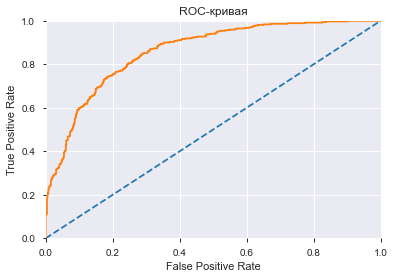

In [129]:
v = model_test(ctb.CatBoostClassifier(random_state=seed),
           [{
    'depth' : [5, 8, 11, 15],
    'learning_rate' : [0.01, 0.03],
    'iterations': [50, 70, 90, 110]
           }], 
               'CatBoostClassifier')

df_scores = df_scores.append(v, ignore_index=True)

#### XGBClassifier

Execution Time: 00:00:33

 ROC AUC: 0.916


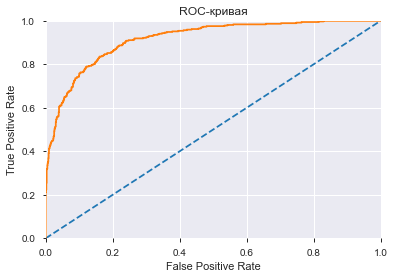

In [130]:
v = model_test(xgb.XGBClassifier(random_state=seed),
           [{
    'n_estimators': [20, 50, 120],
    'colsample_bytree': [0.6, 0.8],
    'max_depth': [5, 10, 15],
    'reg_alpha': [1.1, 1.3],
    'reg_lambda': [1.1, 1.3],
    'subsample': [0.7, 0.9]
           }], 
               'XGBClassifier')

df_scores = df_scores.append(v, ignore_index=True)

#### Итоговая таблица 

In [131]:
df_scores = df_scores.sort_values(by = 'roc_auc', ascending = False)
df_scores

,name,params,roc_auc,accuracy,f1,precision,recall,time
3,LGBMClassifier,"LGBMClassifier(class_weight='balanced', colsam...",0.916369,0.839515,0.731183,0.658065,0.822581,18
5,XGBClassifier,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.916244,0.864479,0.722222,0.791667,0.663978,33
0,RandomForestClassifier,"(DecisionTreeClassifier(criterion='entropy', m...",0.864944,0.789586,0.663626,0.576238,0.782258,14
4,CatBoostClassifier,<catboost.core.CatBoostClassifier object at 0x...,0.859937,0.808131,0.559738,0.715481,0.459677,527
1,DecisionTreeClassifier,DecisionTreeClassifier(class_weight='balanced'...,0.853393,0.774608,0.644144,0.554264,0.768817,1
2,LogisticRegression,"LogisticRegression(C=0.1, class_weight='balanc...",0.84358,0.750357,0.633124,0.5189,0.811828,3


Видим, что на данный момент наилучшая модель LGBMClassifier дает хороший результат на синтетических данных.

#### Вывод 

В данном разделе для обучения были использоваы следующие ML модели: RandomForestClassifier, DecisionTreeClassifier, LogisticRegression, LGBMClassifier, CatBoostClassifier, XGBClassifier. 

Поиск лучших гиперпараметров моделей осуществлялся с помощью RandomizedSearchCV.

Наилучшая модель дала неплохую метрику ROC-AUC. Пришло время проверить модель на тестовой выборке. 

## Тестирование моделей

Напишем функцию для расчета наших метрик и построения графика ROC кривой. 

In [132]:
#функция для AUC-ROC и графика
def auc_roc(model, features_test, target_test):
    
    probabilities_test = model.predict_proba(features_test)
    probabilities_one_test = probabilities_test[:, 1]
    predicted_test = model.predict(features_test)
     
    auc_roc_model = roc_auc_score(target_test, probabilities_one_test)
    accuracy = accuracy_score(target_test, predicted_test)
    f1 = f1_score(target_test,predicted_test)
    
    print(f'AUC-ROC лучшей модели на тестовой выборке {auc_roc_model}') 
    print(f'Accuracy лучшей модели на тестовой выборке {accuracy}') 
    print(f'F1 лучшей модели на тестовой выборке: {f1}')
    
    fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)
    %matplotlib inline
    plt.figure()
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.title('ROC-кривая')
    plt.show() 

AUC-ROC лучшей модели на тестовой выборке 0.9163691408288965
Accuracy лучшей модели на тестовой выборке 0.8395149786019972
F1 лучшей модели на тестовой выборке: 0.7311827956989247


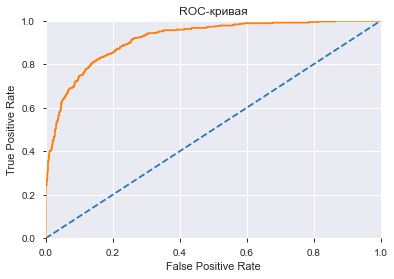

In [133]:
model = df_scores.iloc[0]['params']

auc_roc(model, features_test, target_test)

###  Важность признаков

In [134]:
def importance(model):
    importances = model.feature_importances_
    feature_list = list(features_train.columns)
    feature_results = pd.DataFrame({'feature': feature_list,'importance': importances})
    feature_results = feature_results.sort_values('importance',ascending = False).reset_index(drop=True)

    %matplotlib inline
    fig, ax = plt.subplots(figsize=(16,10))
    feature_results.plot(kind='bar', x='feature', y='importance', ax=ax)
    ax.set_title(f'Важность признаков модели ')
    ax.set_ylabel('Важность')
    fig.tight_layout()

    print(feature_results.head(10))

                           feature  importance
0                             days        2215
1                  monthly_charges        1183
2            paperless_billing_Yes          45
3                 tech_support_Yes          42
4  payment_method_Electronic check          36
5              online_security_Yes          35
6               multiple_lines_Yes          33
7                online_backup_Yes          29
8                   senior_citizen          29
9                    type_Two year          23


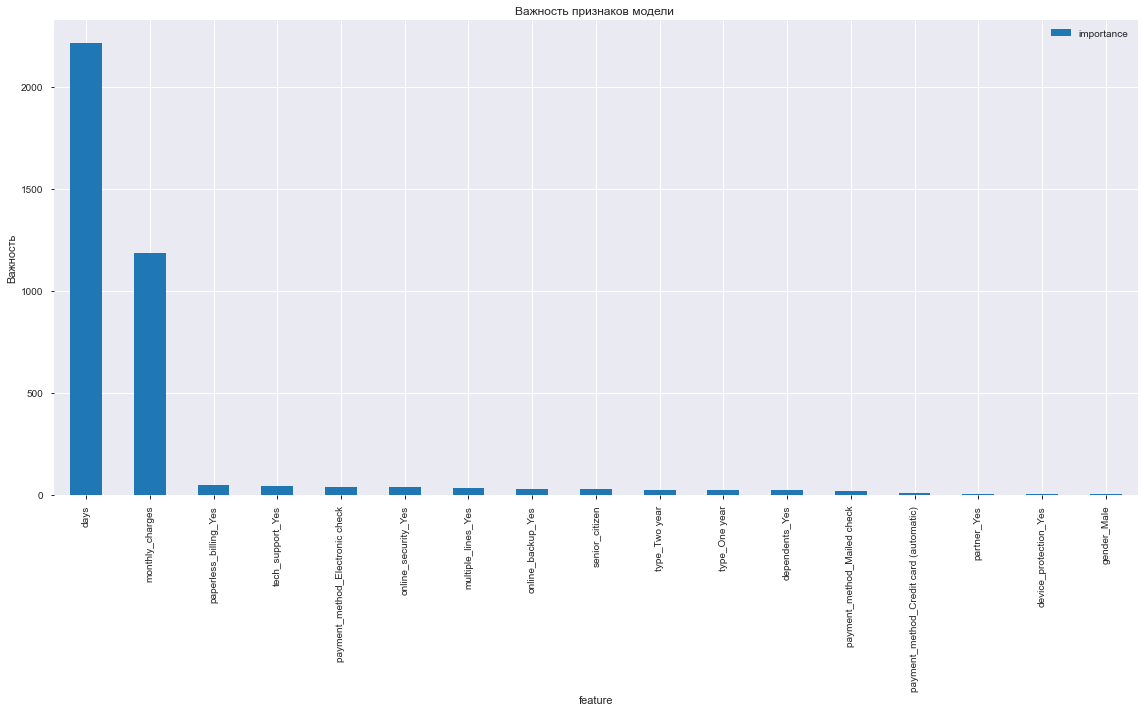

In [135]:
importance(model)

### Удаление маловажных фичей

In [136]:
features = features[['monthly_charges', 'days', 'paperless_billing_Yes', 'tech_support_Yes',
                     'multiple_lines_Yes', 'type_One year']]
target = df['churn']

In [137]:
features

,monthly_charges,days,paperless_billing_Yes,tech_support_Yes,multiple_lines_Yes,type_One year
0,29.85,31,1,0,0,0
1,56.95,1036,0,0,0,1
2,53.85,61,1,0,0,0
3,42.30,1371,0,1,0,1
4,70.70,61,1,0,0,0
...,...,...,...,...,...,...
7004,84.80,730,1,1,1,1
7005,103.20,2191,1,0,1,1
7006,29.60,337,1,0,0,0
7007,74.40,123,1,0,1,0


In [138]:
features_train, features_test, target_train, target_test = train_test_split(
                                                        features,  target, test_size=0.2, random_state=250722, stratify=target)

In [139]:
features_train.shape, features_test.shape, 

((5607, 6), (1402, 6))

In [140]:
target_train.mean(), target_test.mean()

(0.2655609060103442, 0.2653352353780314)

In [141]:
numeric = ['monthly_charges', 'days']
scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

print(features_train.head(10)) 

      monthly_charges      days  paperless_billing_Yes  tech_support_Yes  \
2613         0.466521  1.564370                      1                 1   
5846        -0.312023 -0.355689                      1                 0   
2029         0.184319 -1.292270                      1                 0   
1462         0.288900 -0.393206                      1                 1   
1783         0.433321 -0.844748                      0                 0   
550          1.678326  1.601887                      1                 1   
4293        -0.479684 -0.434742                      1                 0   
3600        -0.497944  0.911845                      1                 0   
3789         0.964523  1.154365                      1                 1   
5526         1.090684 -1.210537                      1                 1   

      multiple_lines_Yes  type_One year  
2613                   0              0  
5846                   1              0  
2029                   0             

In [142]:
#функция для AUC-ROC и графика
def auc_roc_new(model, features_train, target_train, features_test, target_test):
    
    model.fit(features_train, target_train)
    probabilities_test = model.predict_proba(features_test)
    probabilities_one_test = probabilities_test[:, 1]
    predicted_test = model.predict(features_test)
     
    auc_roc_model = roc_auc_score(target_test, probabilities_one_test)
    accuracy = accuracy_score(target_test, predicted_test)
    f1 = f1_score(target_test,predicted_test)
    
    print(f'AUC-ROC лучшей модели на тестовой выборке {auc_roc_model}') 
    print(f'Accuracy лучшей модели на тестовой выборке {accuracy}') 
    print(f'F1 лучшей модели на тестовой выборке: {f1}')
    
    fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)
    %matplotlib inline
    plt.figure()
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.title('ROC-кривая')
    plt.show() 

AUC-ROC лучшей модели на тестовой выборке 0.922829888297317
Accuracy лучшей модели на тестовой выборке 0.8445078459343794
F1 лучшей модели на тестовой выборке: 0.7341463414634146


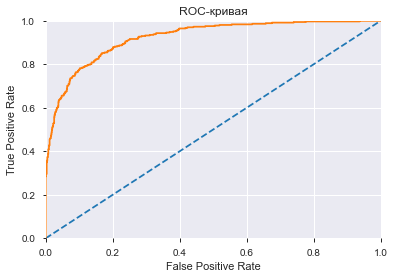

In [143]:
auc_roc_new(model, features_train, target_train,  features_test, target_test)

                 feature  importance
0                   days        2229
1        monthly_charges        1283
2          type_One year          41
3  paperless_billing_Yes          37
4     multiple_lines_Yes          28
5       tech_support_Yes          26


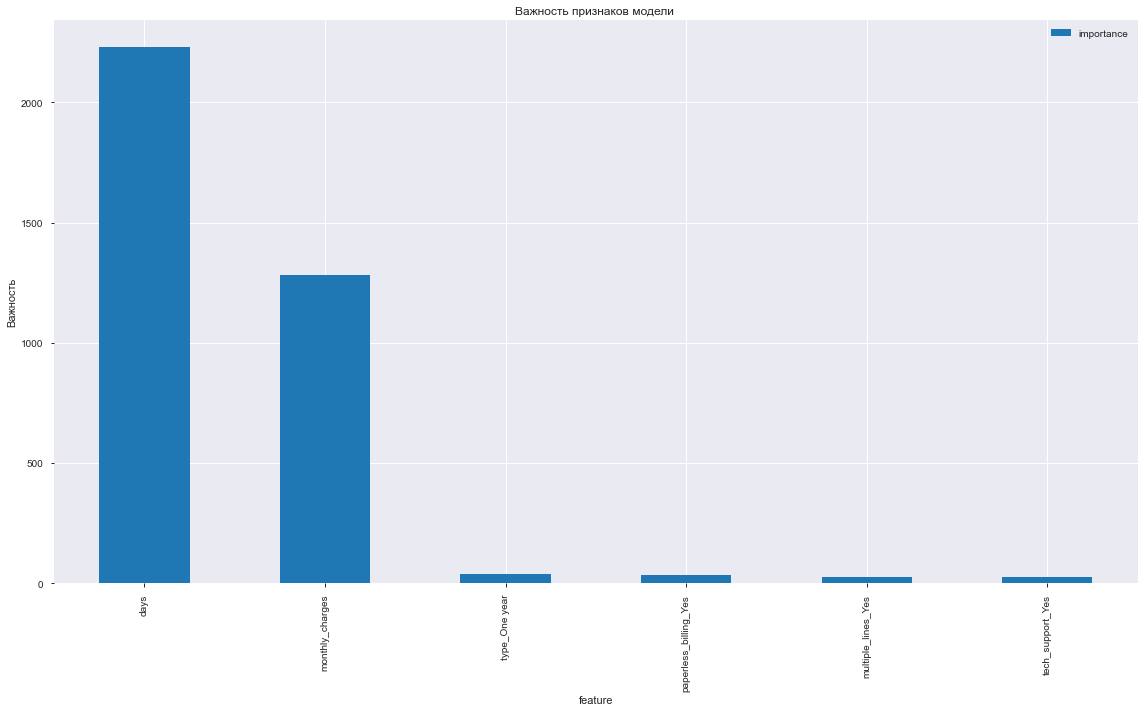

In [144]:
importance(model)

Стало немного лучше. 

### Удаление маловажных фичей 2

In [145]:
features = features[['monthly_charges', 'days']]
target = df['churn']

In [146]:
features

,monthly_charges,days
0,29.85,31
1,56.95,1036
2,53.85,61
3,42.30,1371
4,70.70,61
...,...,...
7004,84.80,730
7005,103.20,2191
7006,29.60,337
7007,74.40,123


In [147]:
features_train, features_test, target_train, target_test = train_test_split(
                                                        features,  target, test_size=0.2, random_state=250722, stratify=target)

In [148]:
features_train.shape, features_test.shape, 

((5607, 2), (1402, 2))

In [149]:
target_train.mean(), target_test.mean()

(0.2655609060103442, 0.2653352353780314)

In [150]:
numeric = ['monthly_charges', 'days']
scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

print(features_train.head(10)) 

      monthly_charges      days
2613         0.466521  1.564370
5846        -0.312023 -0.355689
2029         0.184319 -1.292270
1462         0.288900 -0.393206
1783         0.433321 -0.844748
550          1.678326  1.601887
4293        -0.479684 -0.434742
3600        -0.497944  0.911845
3789         0.964523  1.154365
5526         1.090684 -1.210537


AUC-ROC лучшей модели на тестовой выборке 0.9235280300657689
Accuracy лучшей модели на тестовой выборке 0.8388017118402282
F1 лучшей модели на тестовой выборке: 0.7263922518159805


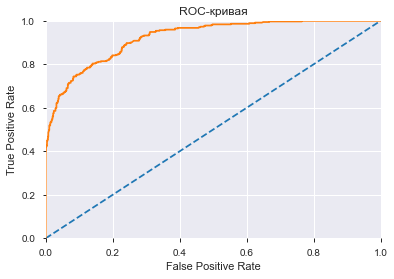

In [151]:
auc_roc_new(model, features_train, target_train,  features_test, target_test)

In [152]:
#функция для AUC-ROC и графика
def auc_roc_new(model, features_train, target_train, features_test, target_test):
    
    model.fit(features_train, target_train)
    probabilities_test = model.predict_proba(features_test)
    probabilities_one_test = probabilities_test[:, 1]
    predicted_test = model.predict(features_test)
     
    auc_roc_model = roc_auc_score(target_test, probabilities_one_test)
    accuracy = accuracy_score(target_test, predicted_test)
    f1 = f1_score(target_test,predicted_test)
    
    print(f'AUC-ROC лучшей модели на тестовой выборке {auc_roc_model}') 
    print(f'Accuracy лучшей модели на тестовой выборке {accuracy}') 
    print(f'F1 лучшей модели на тестовой выборке: {f1}')
    
    fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)
    %matplotlib inline
    plt.figure()
    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.title('ROC-кривая')
    plt.show() 

importance(model)

### Вывод

Видим, что с двумя признаками модель работает немного хуже, чем с шестью, но даже чуть лучше, чем с 22 признаками. 
Много признаков засоряют эфир =)

## Вывод

В результате проекта, нам удалось построить модель, которая определяет факт ухода клиента. ROC-AUC = 0.92. f1 = 0.74

В результате корректировок удалось несущественно изменить метрику качества. 
Убрав неважные признаки, модель стала работать лучше, а важность признаков не исчезла. 

С учетом того, что с большой долей вероятности клиент, имеющий оптоволоконный интернет уйдет, оператору связи стоит задуматьмя либо над уменьшением стоимости услуг, либо над повышением их качества. 
Ну и, конечно, рассылка промо-предложенией и акций спасет мир. 